# STAT 301 Project: AIRBNB

In [13]:
# please run this code in case you haven't installed these packages yet

# install.packages(c('car', 'corrplot', 'skimr'))

 https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities/data?select=london_weekdays.csv

In [14]:
library(dplyr)
library(tidyr)
library(readr)
library(broom)
library(stringr)
library(ggplot2)
library(car)
library(skimr)


## 1. Data Set Overview

### Merging Multiple CSV Files and Creating a Day Type Variable

In this step, we merged multiple Airbnb datasets and created a new categorical variable indicating whether each observation comes from a weekday or a weekend.

#### Step-by-step explanation:

1. **File List Definition**  
   We defined a character vector `file_list` that contains the names of six CSV files, representing data from three cities (Barcelona, London, Paris) across both weekdays and weekends.

2. **Reading and Tagging Data**  
   We used `lapply()` to loop through each file name:
   - Each file was read using `read_csv()`.
   - We created a new column `day_type` using `mutate()`, which assigns either `"weekday"` or `"weekend"` depending on whether the file name contains the string `"weekends"`. This was done using `str_detect()` from the `stringr` package.

3. **Merging Datasets**  
   All the data frames were combined into a single data frame `df_all` using `bind_rows()`.

4. **Result Inspection**  
   We used `head(df_all)` to view the first few rows and `summary(df_all)` to examine the summary statistics of the merged dataset.

#### Purpose:
By creating the `day_type` variable directly from the file names, we are able to track which observations came from weekdays and which from weekends. This allows for further grouped analysis and modeling based on day-of-week effects.


In [15]:
# file_list <- c("barcelona_weekdays.csv", "barcelona_weekends.csv",
#                "london_weekdays.csv", "london_weekends.csv",
#                "paris_weekdays.csv", "paris_weekends.csv")

# df_all <- file_list %>%
#   lapply(function(file) {
#     read_csv(file) %>%
#       mutate(
#         day_type = ifelse(str_detect(file, "weekends"), "weekend", "weekday")
#       )
#   }) %>%
#   bind_rows()

# load the csv files for each city (weekday and weekend)

# IMPORTANT NOTE: Ensure the CSV files are in the "data" directory relative to your working directory
paris_weekday <- read_csv("data/paris_weekdays.csv")
paris_weekend <- read_csv("data/paris_weekends.csv")
vienna_weekday <- read_csv("data/vienna_weekdays.csv")
vienna_weekend <- read_csv("data/vienna_weekends.csv")
barcelona_weekday <- read_csv("data/barcelona_weekdays.csv")
barcelona_weekend <- read_csv("data/barcelona_weekends.csv")

head(paris_weekday)
head(paris_weekend)
head(vienna_weekday)
head(vienna_weekend)
head(barcelona_weekday)
head(barcelona_weekend)

New names:
• `` -> `...1`
Rows: 3130 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 3558 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 1738 Columns: 20
── Column specification ─────────────────

...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475
3,298.9561,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,91,1,0.5475667,0.1959965,542.1420,26.39129,1199.1842,70.46351,2.35600,48.86100
4,247.9262,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,7,82,1,1.1979209,0.1035729,406.9290,19.80916,1070.7755,62.91827,2.35915,48.86648
5,527.0761,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,10,93,1,1.5432015,0.5491303,967.4781,47.09651,1095.8704,64.39284,2.33201,48.85891


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,536.3967,Entire home/apt,FALSE,FALSE,5,FALSE,0,1,9,89,1,1.3512012,0.21234554,390.7768,19.00155,1030.7385,47.55037,2.35900,48.86800
1,290.1016,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998212,0.19371031,518.4783,25.21104,1218.6589,56.21958,2.35385,48.86282
2,445.7545,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,100,1,0.9689817,0.29434293,432.6899,21.03958,1069.8948,49.35674,2.36023,48.86375
3,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023186,0.23473971,444.5553,21.61653,902.8564,41.65087,2.31714,48.87475
4,266.3342,Entire home/apt,FALSE,FALSE,2,TRUE,0,0,9,88,1,1.4024298,0.05505193,1013.4587,49.27950,1348.0635,62.18931,2.33408,48.85384
5,345.0927,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,91,1,0.5475705,0.19600551,542.1394,26.36157,1199.1796,55.32095,2.35600,48.86100


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,250.5668,Entire home/apt,FALSE,FALSE,3,TRUE,1,0,10,99,1,1.732893,0.2126271,118.64683,8.496979,185.09672,4.424871,16.36500,48.22300
1,156.6043,Entire home/apt,FALSE,FALSE,3,FALSE,0,0,10,97,1,4.807912,0.2282531,80.14502,5.739643,85.72760,2.049380,16.33356,48.17459
2,283.0564,Entire home/apt,FALSE,FALSE,5,TRUE,0,1,10,95,2,2.811773,0.2441629,101.24811,7.250957,151.36429,3.618473,16.33600,48.21100
3,301.7554,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,94,2,3.240595,0.6104299,92.47394,6.622588,129.86383,3.104489,16.33006,48.20921
4,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,96,1,2.241146,1.1195067,124.25677,8.898738,154.34897,3.689824,16.38867,48.19104
5,162.4477,Private room,FALSE,TRUE,2,TRUE,1,0,10,99,1,4.611961,0.1999263,52.07794,3.729599,75.51554,1.805254,16.39755,48.24682


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,324.6617,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,94,2,3.240613,0.6104498,92.47347,6.622340,129.86288,3.138736,16.33006,48.20921
1,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,96,1,2.241126,1.1195048,124.25800,8.898538,154.35032,3.730588,16.38867,48.19104
2,196.3397,Entire home/apt,FALSE,FALSE,3,TRUE,0,1,9,91,1,2.371551,0.4524187,125.41313,8.981261,206.64249,4.994469,16.34236,48.20436
3,107.7531,Private room,FALSE,TRUE,2,FALSE,0,0,8,92,1,3.629114,0.4731637,62.45942,4.472931,93.81071,2.267369,16.37837,48.24102
4,196.3397,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,9,94,1,2.395063,0.4436346,124.02036,8.881520,202.31807,4.889950,16.34198,48.20456
5,212.2338,Entire home/apt,FALSE,FALSE,2,TRUE,1,0,10,97,1,2.011143,0.6790809,145.34915,10.408947,237.98831,5.752086,16.34682,48.20620


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,474.3175,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,91,1,1.111996,0.63049095,526.4694,17.94293,915.5871,20.15489,2.17556,41.39624
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,88,1,1.751839,0.12401717,320.1275,10.91046,794.2774,17.48449,2.14906,41.38714
2,161.9848,Private room,FALSE,TRUE,4,FALSE,0,1,9,88,1,1.670493,0.08032198,344.0739,11.72659,840.6736,18.50581,2.15357,41.37859
3,367.9568,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,10,91,1,1.475847,0.09310686,400.0574,13.63460,946.5899,20.83736,2.16839,41.37390
4,196.8953,Private room,FALSE,TRUE,3,FALSE,1,0,9,91,1,1.855452,0.27248605,346.0422,11.79368,792.2960,17.44087,2.15238,41.37699
5,330.9517,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,9,100,2,2.565611,0.70129045,391.0874,13.32889,525.5139,11.56818,2.18197,41.40842


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,532.0362,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,91,1,1.1119980,0.63050396,526.4715,20.32767,915.5915,20.11247,2.17556,41.39624
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,88,1,1.7518309,0.12401273,320.1283,12.36052,794.2797,17.44766,2.14906,41.38714
2,196.8953,Private room,FALSE,TRUE,2,FALSE,1,0,9,90,1,0.6217308,0.29751560,503.3540,19.43508,1242.4342,27.29211,2.16500,41.38300
3,141.2712,Private room,FALSE,TRUE,3,FALSE,0,1,9,86,1,1.6483109,0.08944189,342.5958,13.22802,820.9220,18.03290,2.15342,41.37912
4,715.2000,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,9,95,2,0.6935603,0.35765301,537.8031,20.76520,1081.5601,23.75824,2.17498,41.39214
5,173.3889,Private room,FALSE,TRUE,2,FALSE,0,0,9,96,1,1.4742189,0.59051076,448.4062,17.31348,752.7611,16.53563,2.18195,41.39691


| Column Name                | Description                                                                          |
|---------------------------|--------------------------------------------------------------------------------------|
| **realSum**               | *The total price of the Airbnb listing.* (Numeric)                                   |
| **room_type**             | *The type of room being offered (e.g. private, shared, etc.).* (Categorical)         |
| **room_shared**           | *Whether the room is shared or not.* (Boolean)                                       |
| **room_private**          | *Whether the room is private or not.* (Boolean)                                      |
| **person_capacity**       | *The maximum number of people that can stay in the room.* (Numeric)                  |
| **host_is_superhost**     | *Whether the host is a superhost or not.* (Boolean)                                  |
| **multi**                 | *Whether the listing is for multiple rooms or not.* (Boolean)                        |
| **biz**                   | *Whether the listing is for business purposes or not.* (Boolean)                     |
| **cleanliness_rating**    | *The cleanliness rating of the listing.* (Numeric)                                   |
| **guest_satisfaction_overall** | *The overall guest satisfaction rating of the listing.* (Numeric)           |
| **bedrooms**              | *The number of bedrooms in the listing.* (Numeric)                                   |
| **dist**                  | *The distance from the city centre.* (Numeric)                                       |
| **metro_dist**            | *The distance from the nearest metro station.* (Numeric)                             |
| **attr_index**            | *An index representing the number and popularity of nearby attractions.* (Numeric)   |
| **attr_index_norm**       | *Normalized version of `attr_index` between 0 and 1.* (Numeric)                      |
| **rest_index**            | *An index representing the number and quality of nearby restaurants.* (Numeric)      |
| **rest_index_norm**       | *Normalized version of `rest_index` between 0 and 1.* (Numeric)                      |
| **lng**                   | *The longitude of the listing.* (Numeric)                                            |
| **lat**                   | *The latitude of the listing.* (Numeric)                                             |
| **day_type**              | *Indicates whether the listing is for a weekday or weekend.* (Categorical)           |


In [16]:
# head(df_all)
# n_obs <- nrow(df_all)
# n_vars <- ncol(df_all)

# cat("Number of observations:", n_obs, "\n")
# cat("Number of variables:", n_vars, "\n")

# combine the data into 3 dataframes for each city
paris_data <- bind_rows(
  paris_weekday %>% mutate(day_type = "Weekday"),
  paris_weekend %>% mutate(day_type = "Weekend")
)

vienna_data <- bind_rows(
  vienna_weekday %>% mutate(day_type = "Weekday"),
  vienna_weekend %>% mutate(day_type = "Weekend")
)

barcelona_data <- bind_rows(
  barcelona_weekday %>% mutate(day_type = "Weekday"),
  barcelona_weekend %>% mutate(day_type = "Weekend")
)

head(paris_data)
head(vienna_data)
head(barcelona_data)


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,⋯,1,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282,Weekday
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,⋯,1,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902,Weekday
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,⋯,1,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475,Weekday
3,298.9561,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,⋯,1,0.5475667,0.1959965,542.1420,26.39129,1199.1842,70.46351,2.35600,48.86100,Weekday
4,247.9262,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,7,⋯,1,1.1979209,0.1035729,406.9290,19.80916,1070.7755,62.91827,2.35915,48.86648,Weekday
5,527.0761,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,10,⋯,1,1.5432015,0.5491303,967.4781,47.09651,1095.8704,64.39284,2.33201,48.85891,Weekday


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,250.5668,Entire home/apt,FALSE,FALSE,3,TRUE,1,0,10,⋯,1,1.732893,0.2126271,118.64683,8.496979,185.09672,4.424871,16.36500,48.22300,Weekday
1,156.6043,Entire home/apt,FALSE,FALSE,3,FALSE,0,0,10,⋯,1,4.807912,0.2282531,80.14502,5.739643,85.72760,2.049380,16.33356,48.17459,Weekday
2,283.0564,Entire home/apt,FALSE,FALSE,5,TRUE,0,1,10,⋯,2,2.811773,0.2441629,101.24811,7.250957,151.36429,3.618473,16.33600,48.21100,Weekday
3,301.7554,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,⋯,2,3.240595,0.6104299,92.47394,6.622588,129.86383,3.104489,16.33006,48.20921,Weekday
4,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,⋯,1,2.241146,1.1195067,124.25677,8.898738,154.34897,3.689824,16.38867,48.19104,Weekday
5,162.4477,Private room,FALSE,TRUE,2,TRUE,1,0,10,⋯,1,4.611961,0.1999263,52.07794,3.729599,75.51554,1.805254,16.39755,48.24682,Weekday


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,474.3175,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,⋯,1,1.111996,0.63049095,526.4694,17.94293,915.5871,20.15489,2.17556,41.39624,Weekday
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,⋯,1,1.751839,0.12401717,320.1275,10.91046,794.2774,17.48449,2.14906,41.38714,Weekday
2,161.9848,Private room,FALSE,TRUE,4,FALSE,0,1,9,⋯,1,1.670493,0.08032198,344.0739,11.72659,840.6736,18.50581,2.15357,41.37859,Weekday
3,367.9568,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,10,⋯,1,1.475847,0.09310686,400.0574,13.63460,946.5899,20.83736,2.16839,41.37390,Weekday
4,196.8953,Private room,FALSE,TRUE,3,FALSE,1,0,9,⋯,1,1.855452,0.27248605,346.0422,11.79368,792.2960,17.44087,2.15238,41.37699,Weekday
5,330.9517,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,9,⋯,2,2.565611,0.70129045,391.0874,13.32889,525.5139,11.56818,2.18197,41.40842,Weekday


In [17]:
# as.data.frame(skim(df_all))

nrow(paris_data) == nrow(paris_weekday) + nrow(paris_weekend)
nrow(vienna_data) == nrow(vienna_weekday) + nrow(vienna_weekend)
nrow(barcelona_data) == nrow(barcelona_weekday) + nrow(barcelona_weekend)

[1] TRUE

[1] TRUE

[1] TRUE

In [18]:
# list columns and check if they are the same across all dataframes

colnames(paris_data)
colnames(vienna_data)
colnames(barcelona_data)

all(colnames(paris_data) == colnames(vienna_data)) && all(colnames(paris_data) == colnames(barcelona_data))

[1] "...1"                       "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"                       
[21] "day_type"

[1] "...1"                       "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"                       
[21] "day_type"

[1] "...1"                       "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"                       
[21] "day_type"

[1] TRUE

In [19]:
# clean each dataframe

# Create a list of dataframes
city_data_list <- list(
  paris = paris_data,
  vienna = vienna_data,
  barcelona = barcelona_data
)

# Clean all dataframes using a for loop
for (city in names(city_data_list)) {
  city_data_list[[city]] <- city_data_list[[city]] %>%
    select(-1, -attr_index, -rest_index) %>%
    mutate(
      room_type = as.factor(room_type),
      host_is_superhost = as.factor(host_is_superhost),
      multi = as.factor(multi),
      biz = as.factor(biz),
      day_type = as.factor(day_type)
    ) %>%
    filter(realSum <= mean(realSum) + 3*sd(realSum)) %>%
    mutate(price_per_person = realSum/person_capacity) %>%
    mutate(across(c(cleanliness_rating, guest_satisfaction_overall, 
                    dist, metro_dist), scale)) %>%
    na.omit()
}

# Assign the cleaned dataframes back to their original names
paris_data <- city_data_list$paris
vienna_data <- city_data_list$vienna
barcelona_data <- city_data_list$barcelona


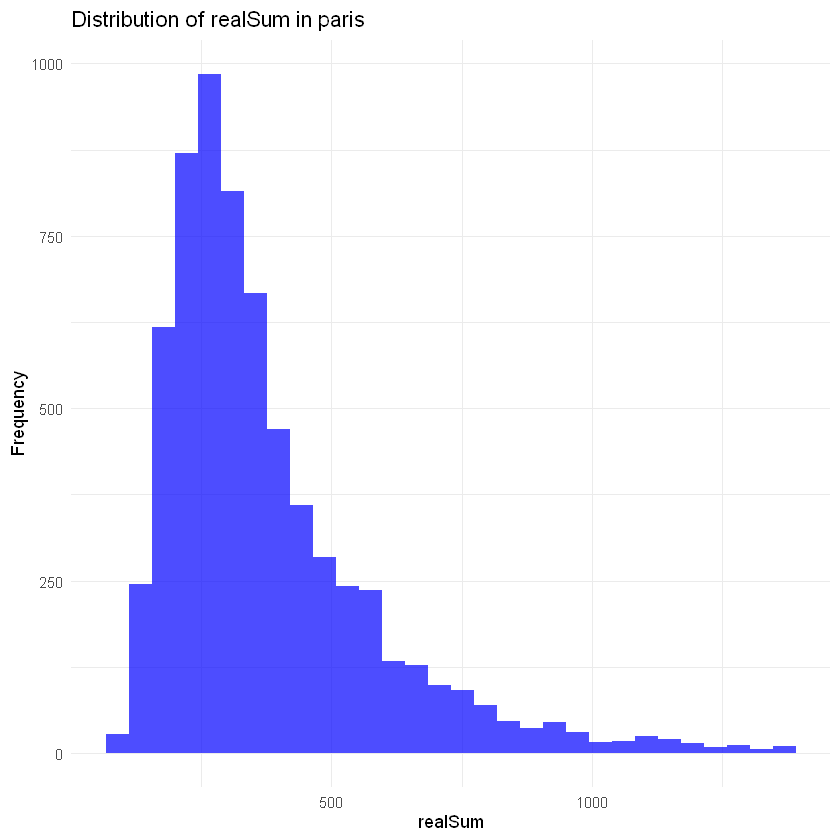

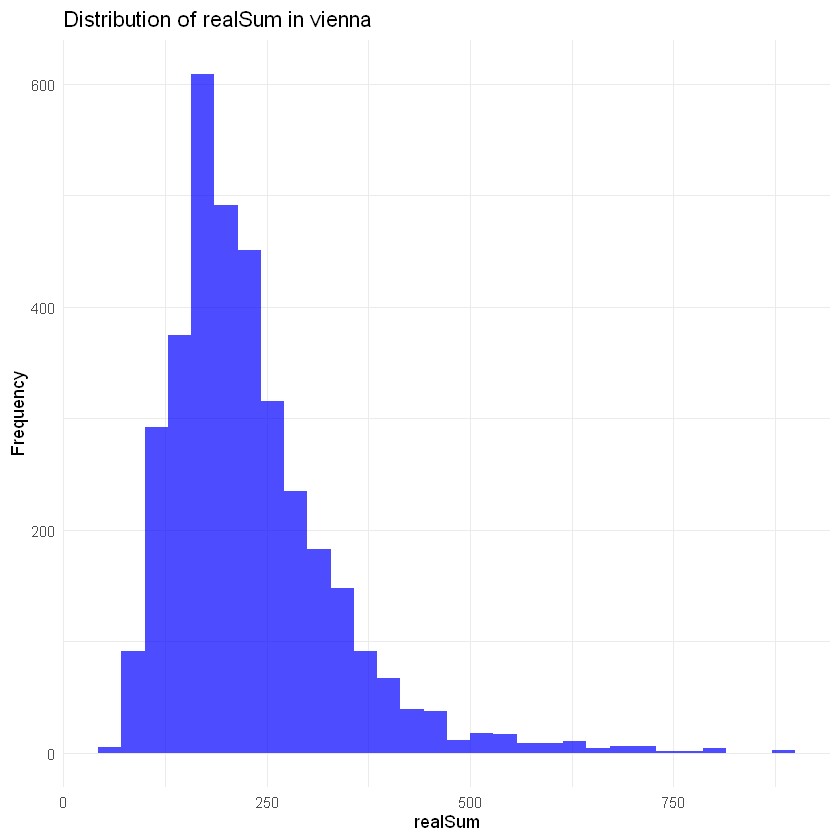

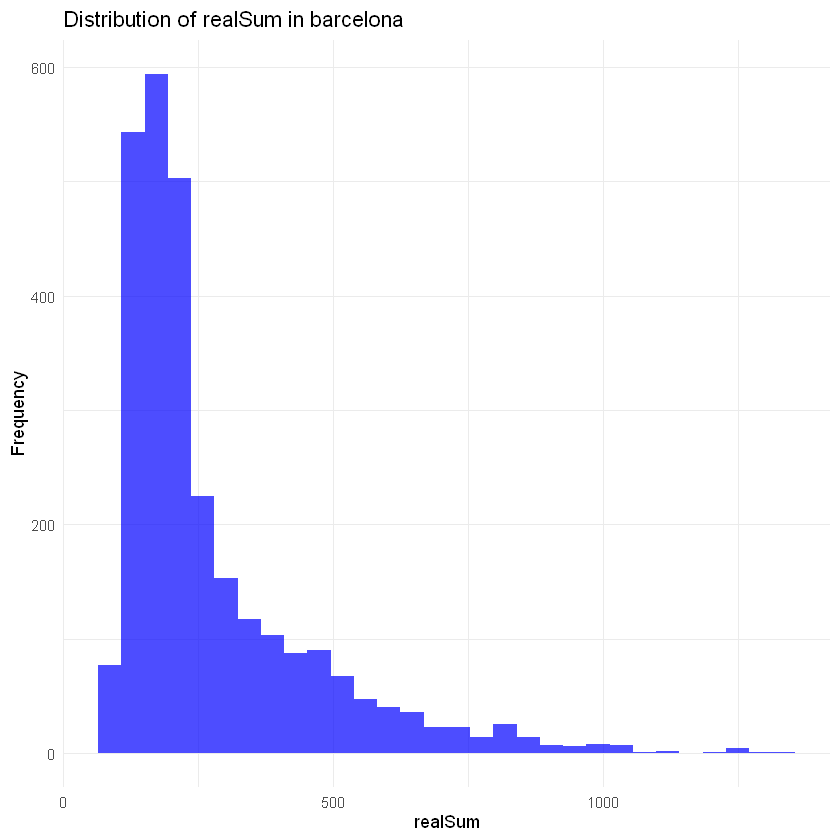

In [20]:
# check distribution of realSum in each city

for (city in names(city_data_list)) {

  plot_city <- ggplot(city_data_list[[city]], aes(x = realSum)) +
    geom_histogram(bins = 30, fill = "blue", alpha = 0.7) +
    labs(title = paste("Distribution of realSum in", city),
         x = "realSum",
         y = "Frequency") +
    theme_minimal()
  print(plot_city)
}

In [21]:
# apply log transformation to realSum in each city

for (city in names(city_data_list)) {
  city_data_list[[city]] <- city_data_list[[city]] %>%
    mutate(log_realSum = log(realSum + 1)) # Adding 1 to avoid log(0)
}

In [22]:
# drop realSum and use log_realSum as the response variable

for (city in names(city_data_list)) {
  city_data_list[[city]] <- city_data_list[[city]] %>%
    select(-realSum)
}

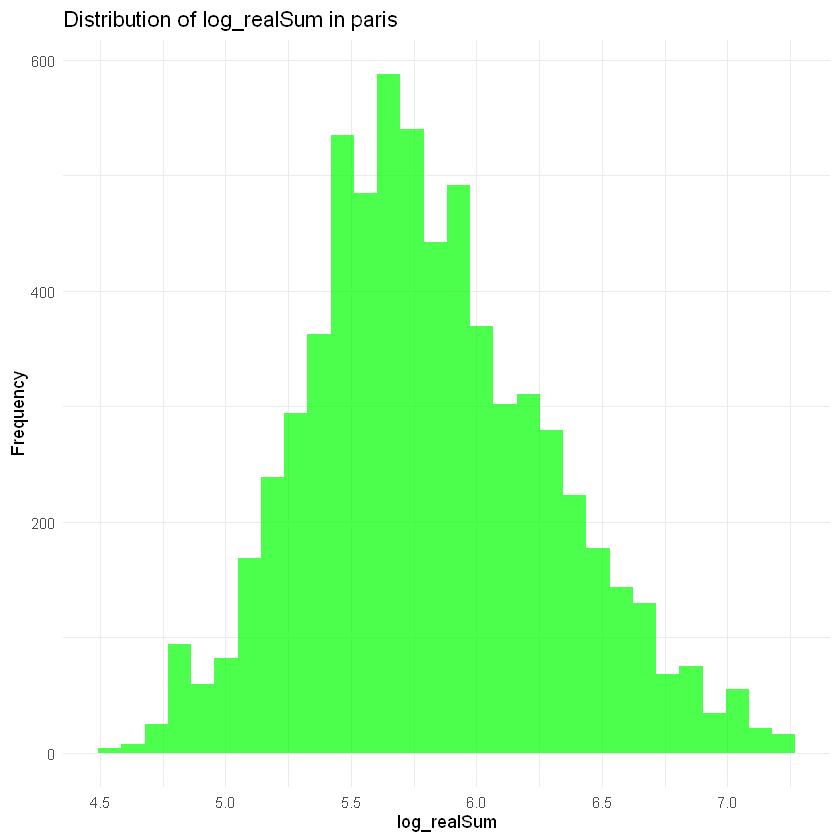

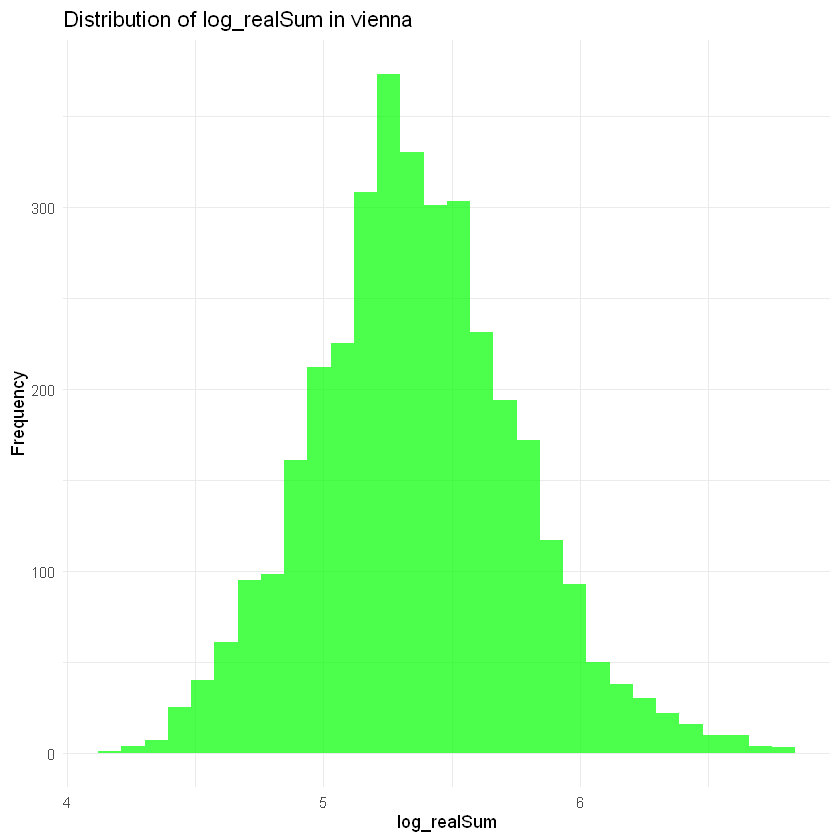

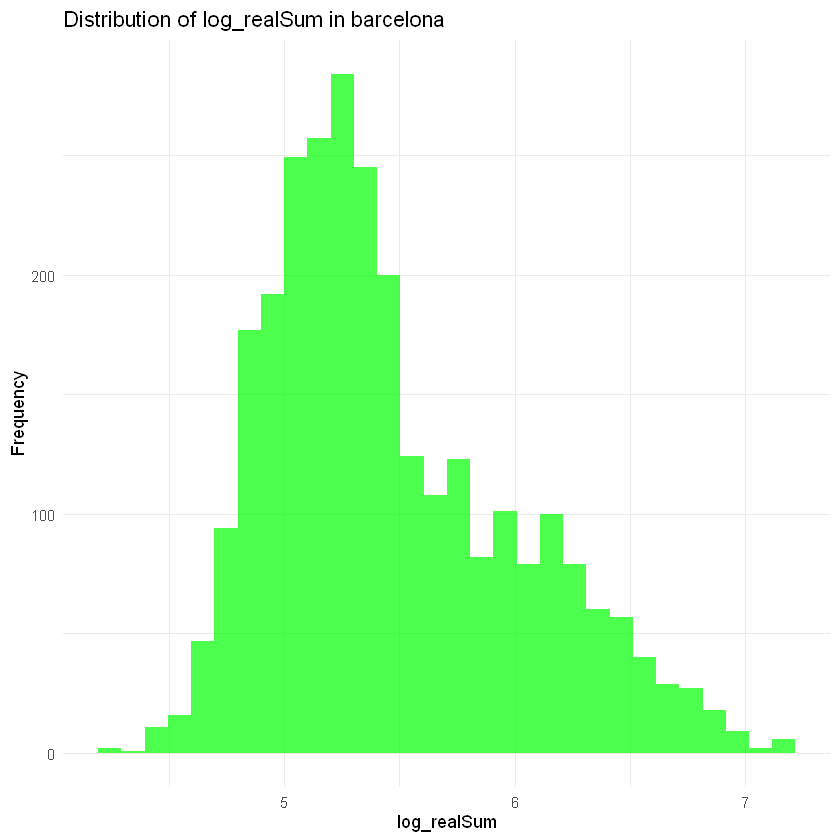

In [23]:
# plot distribution of log_realSum in each city again to check

for (city in names(city_data_list)) {

  plot_city <- ggplot(city_data_list[[city]], aes(x = log_realSum)) +
    geom_histogram(bins = 30, fill = "green", alpha = 0.7) +
    labs(title = paste("Distribution of log_realSum in", city),
         x = "log_realSum",
         y = "Frequency") +
    theme_minimal()
  print(plot_city)
}

In [24]:
# split all 3 dataframes into 80% training, 10% testing, and 10% for inference

set.seed(123)  # For reproducibility

for (city in names(city_data_list)) {
  df <- city_data_list[[city]]
  
  # Create a random sample of row indices for training (80%)
  train_indices <- sample(1:nrow(df), size = 0.8 * nrow(df))
  
  # Create the training set
  train_set <- df[train_indices, ]
  
  # Create the remaining data for testing and inference (20%)
  remaining_set <- df[-train_indices, ]
  
  # Split the remaining set into testing (10%) and inference (10%)
  test_indices <- sample(1:nrow(remaining_set), size = 0.5 * nrow(remaining_set))
  
  test_set <- remaining_set[test_indices, ]
  inference_set <- remaining_set[-test_indices, ]
  
  # Assign the sets back to the list
  city_data_list[[city]] <- list(
    train = train_set,
    test = test_set,
    inference = inference_set
  )
}

# Assign the sets back to their original names
paris_train <- city_data_list$paris$train
paris_test <- city_data_list$paris$test
paris_inference <- city_data_list$paris$inference

vienna_train <- city_data_list$vienna$train
vienna_test <- city_data_list$vienna$test
vienna_inference <- city_data_list$vienna$inference

barcelona_train <- city_data_list$barcelona$train
barcelona_test <- city_data_list$barcelona$test
barcelona_inference <- city_data_list$barcelona$inference

In [25]:
city_train_list <- list(
  paris = paris_train,
  vienna = vienna_train,
  barcelona = barcelona_train
)

city_test_list <- list(
  paris = paris_test,
  vienna = vienna_test,
  barcelona = barcelona_test
)

city_inference_list <- list(
  paris = paris_inference,
  vienna = vienna_inference,
  barcelona = barcelona_inference
)


Correlation matrix for paris :


Correlation matrix for vienna :


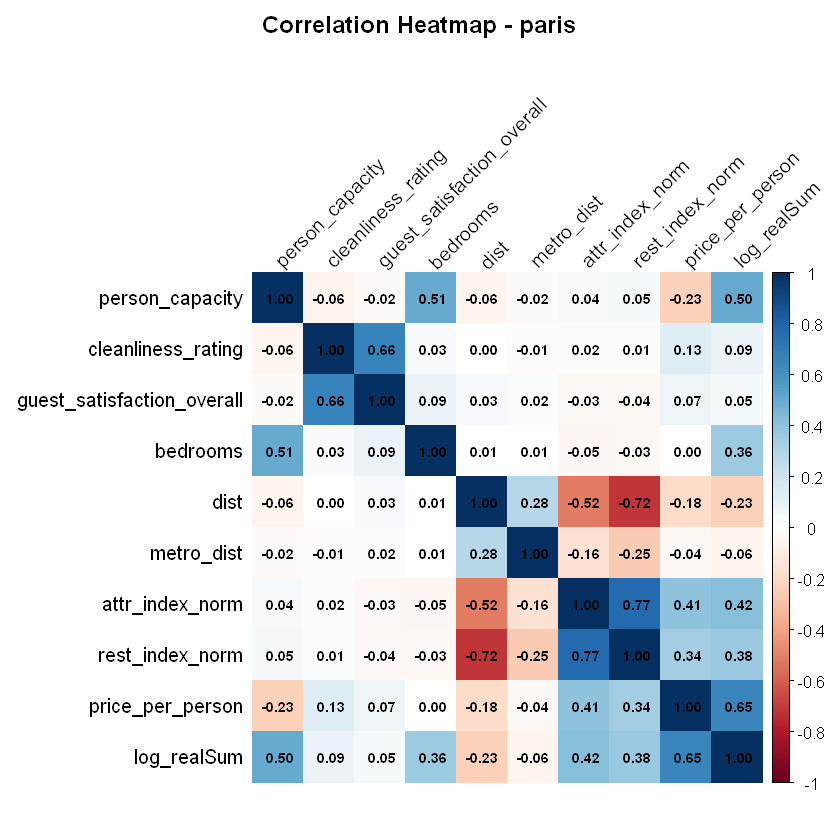



Correlation matrix for barcelona :


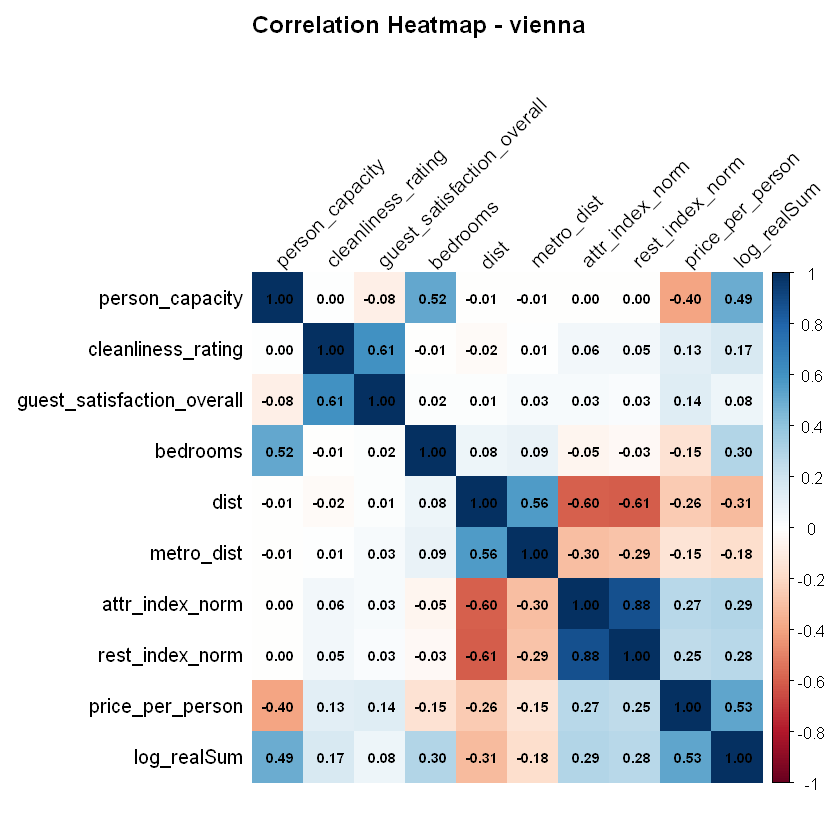

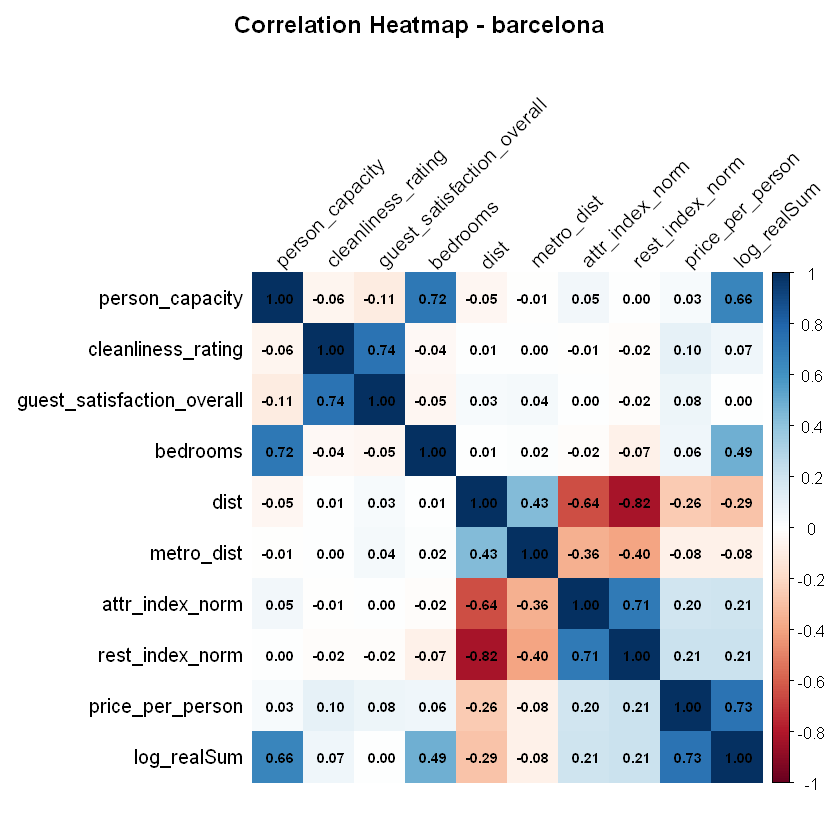

In [26]:
library(corrplot)

# Modify the for loop to create correlation heatmaps
for (city in names(city_train_list)) {
  # Select only numeric columns for correlation
  numeric_cols <- city_train_list[[city]] %>%
    select_if(is.numeric) %>%
    select(-lng, -lat) # excluding coordinates for clarity
  
  # Calculate correlation matrix
  corr_matrix <- cor(numeric_cols, use = "complete.obs")
  
  # Create correlation plot
  cat(paste("\nCorrelation matrix for", city, ":\n"))
  
  # Plot correlation matrix
  corrplot(corr_matrix, 
          method = "color",
          type = "full",
          addCoef.col = "black",
          tl.col = "black",
          tl.srt = 45,
          number.cex = 0.7,
          title = paste("Correlation Heatmap -", city),
          mar = c(0,0,2,0))
  
  # Add some space between plots
  cat("\n")
}

In [28]:
# check if top affected variables are the same across all cities
top_vars_list <- list()

for (city in names(city_train_list)) {
  # Select only numeric columns for correlation
  numeric_cols <- city_train_list[[city]] %>%
    select_if(is.numeric) %>%
    select(-lng, -lat) # excluding coordinates for clarity
  
  # Calculate correlation matrix
  corr_matrix <- cor(numeric_cols, use = "complete.obs")
  
  # Find the top affected variables (e.g., those with high correlation with log_realSum)
  top_vars <- sort(abs(corr_matrix["log_realSum", ]), decreasing = TRUE)[-1] # Exclude self-correlation
  
  # Store the top variables in the list
  top_vars_list[[city]] <- names(top_vars) 
}

top_vars_list


$paris
[1] "price_per_person"           "person_capacity"           
[3] "attr_index_norm"            "rest_index_norm"           
[5] "bedrooms"                   "dist"                      
[7] "cleanliness_rating"         "metro_dist"                
[9] "guest_satisfaction_overall"

$vienna
[1] "price_per_person"           "person_capacity"           
[3] "dist"                       "bedrooms"                  
[5] "attr_index_norm"            "rest_index_norm"           
[7] "metro_dist"                 "cleanliness_rating"        
[9] "guest_satisfaction_overall"

$barcelona
[1] "price_per_person"           "person_capacity"           
[3] "bedrooms"                   "dist"                      
[5] "rest_index_norm"            "attr_index_norm"           
[7] "metro_dist"                 "cleanliness_rating"        
[9] "guest_satisfaction_overall"

**Insights**

We see that between these 3 cities, the top 9 affected variables for them are the same (just different in order)

## Plots

In [11]:
# ggplot(df_all, aes(x = log(realSum))) +
#   geom_histogram(bins = 50, fill = "skyblue", color = "white") +
#   labs(title = "Distribution of Airbnb Prices (log scale)",
#        x = "Price (log10)",
#        y = "Count") +
#   theme_minimal()



In [12]:
# ggplot(df_all, aes(x = realSum)) +
#   geom_histogram(bins = 50, fill = "skyblue", color = "white") +
#   labs(
#     title = "Airbnb Price Distribution by City (Original Scale)",
#     x = "Price (realSum)",
#     y = "Count"
#   ) +
#   theme_minimal()

In [13]:
# ggplot(df_all, aes(x = room_type, y = realSum)) +
#   geom_boxplot(fill = "skyblue") +
#   scale_y_log10() +
#   labs(title = "Price by Room Type", x = "Room Type", y = "Price (log scale)")


In [14]:
# ggplot(df_all, aes(x = dist, y = realSum, color = day_type)) +
#   geom_point(alpha = 0.5) +
#   geom_smooth() +  
#   scale_y_log10() +
#   labs(title = "Price vs Distance from City Centre",
#        x = "Distance to Centre", y = "Price (log scale)")



In [15]:
# ggplot(df_all, aes(x = day_type, y = realSum, fill = day_type)) +
#   geom_boxplot(outlier.alpha = 0.2) +
#   stat_summary(fun = mean, geom = "point", shape = 18, size = 3, color = "red") +
#   scale_y_log10() +
#   labs(title = "Price Distribution by Day Type (with Mean)",
#        x = "Day Type", y = "Price (log scale)") +
#   theme_minimal()


In [16]:
# ggplot(df_all, aes(x = factor(person_capacity), y = log(realSum))) +
#   geom_boxplot(fill = "lightblue", outlier.alpha = 0.2) +
#   labs(
#     title = "Price Distribution by Person Capacity",
#     x = "Person Capacity (as factor)",
#     y = "Price (realSum)"
#   ) +
#   theme_minimal()



In [17]:
# ggplot(df_all, aes(x = factor(cleanliness_rating), y = realSum)) +
#   geom_boxplot(fill = "lightgreen", outlier.alpha = 0.2) +
#   scale_y_log10() +
#   labs(
#     title = "Price Distribution by Cleanliness Rating",
#     x = "Cleanliness Rating (as factor)",
#     y = "Price (log scale)"
#   ) +
#   theme_minimal()




In [32]:
## check for multicollinearity between top predictors only in each city

# for (city in names(city_train_list)) {
#     fit_city <- lm(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + rest_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall, data = city_train_list[[city]])
#     vif_values <- vif(fit_city)  
#   cat(paste("\nMulticollinearity VIF values for", city, ":\n"))
#   print(vif_values)
# }

fit_paris <- lm(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + rest_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall, data = paris_train)
paris_values <- vif(fit_paris)
print("\nMulticollinearity VIF values for Paris:\n")
print(paris_values)

[1] "\nMulticollinearity VIF values for Paris:\n"
          price_per_person            person_capacity 
                  1.379467                   1.531169 
                  bedrooms            attr_index_norm 
                  1.427406                   2.668540 
           rest_index_norm                       dist 
                  3.826508                   2.142829 
        cleanliness_rating                 metro_dist 
                  1.801866                   1.097319 
guest_satisfaction_overall 
                  1.799275 


In [33]:
fit_vienna <- lm(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + rest_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall, data = vienna_train)
vienna_values <- vif(fit_vienna)
print("\nMulticollinearity VIF values for Vienna:\n")
print(vienna_values)

[1] "\nMulticollinearity VIF values for Vienna:\n"
          price_per_person            person_capacity 
                  1.365988                   1.670561 
                  bedrooms            attr_index_norm 
                  1.413068                   4.511581 
           rest_index_norm                       dist 
                  4.577650                   2.219911 
        cleanliness_rating                 metro_dist 
                  1.619600                   1.483129 
guest_satisfaction_overall 
                  1.626493 


In [34]:
fit_barcelona <- lm(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + rest_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall, data = barcelona_train)
barcelona_values <- vif(fit_barcelona)
print("\nMulticollinearity VIF values for Barcelona:\n")
print(barcelona_values)

[1] "\nMulticollinearity VIF values for Barcelona:\n"
          price_per_person            person_capacity 
                  1.096544                   2.111964 
                  bedrooms            attr_index_norm 
                  2.108552                   2.073790 
           rest_index_norm                       dist 
                  3.781395                   3.410019 
        cleanliness_rating                 metro_dist 
                  2.237041                   1.257433 
guest_satisfaction_overall 
                  2.254291 


**Insights:**

In all 3 cities, rest_index_norm has the highest VIF (close to 4 in Paris and Barcelona and close to 5 in Vienna)

In [ ]:
fit_paris_0 <- lm(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall, data = paris_train)
paris_values_0 <- vif(fit_paris_0)
print("\nNew multicollinearity VIF values for Paris:\n")
print(paris_values_0)

[1] "\nNew multicollinearity VIF values for Paris:\n"
          price_per_person            person_capacity 
                  1.366179                   1.528739 
                  bedrooms            attr_index_norm 
                  1.426327                   1.642165 
                      dist         cleanliness_rating 
                  1.455399                   1.801855 
                metro_dist guest_satisfaction_overall 
                  1.088562                   1.798957 


In [38]:
fit_vienna_0 <- lm(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall, data = vienna_train)
vienna_values_0 <- vif(fit_vienna_0)
print("\nNew multicollinearity VIF values for Vienna:\n")
print(vienna_values_0)

[1] "\nNew multicollinearity VIF values for Vienna:\n"
          price_per_person            person_capacity 
                  1.365968                   1.669624 
                  bedrooms            attr_index_norm 
                  1.409903                   1.606946 
                      dist         cleanliness_rating 
                  2.109671                   1.619487 
                metro_dist guest_satisfaction_overall 
                  1.475966                   1.626432 


In [39]:
fit_barcelona_0 <- lm(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall, data = barcelona_train)
barcelona_values_0 <- vif(fit_barcelona_0)
print("\nNew multicollinearity VIF values for Barcelona:\n")
print(barcelona_values_0)

[1] "\nNew multicollinearity VIF values for Barcelona:\n"
          price_per_person            person_capacity 
                  1.096471                   2.111916 
                  bedrooms            attr_index_norm 
                  2.093392                   1.744580 
                      dist         cleanliness_rating 
                  1.922995                   2.234935 
                metro_dist guest_satisfaction_overall 
                  1.256214                   2.253126 


In [40]:
# double check to see if the VIFs are improved

# Function to calculate VIF summary statistics
vif_summary <- function(vif_values) {
  return(c(
    min = round(min(vif_values), 3),
    median = round(median(vif_values), 3),
    max = round(max(vif_values), 3)
  ))
}

# Create comparison table
cat("VIF Summary Statistics Before vs After dropping rest_index_norm:\n\n")

# Paris comparison
cat("Paris:\n")
cat("Before:", paste(vif_summary(paris_values), collapse = ", "), "\n")
cat("After: ", paste(vif_summary(paris_values_0), collapse = ", "), "\n\n")

# Vienna comparison
cat("Vienna:\n")
cat("Before:", paste(vif_summary(vienna_values), collapse = ", "), "\n")
cat("After: ", paste(vif_summary(vienna_values_0), collapse = ", "), "\n\n")

# Barcelona comparison
cat("Barcelona:\n")
cat("Before:", paste(vif_summary(barcelona_values), collapse = ", "), "\n")
cat("After: ", paste(vif_summary(barcelona_values_0), collapse = ", "), "\n")

VIF Summary Statistics Before vs After dropping rest_index_norm:

Paris:
Before: 1.097, 1.799, 3.827 
After:  1.089, 1.492, 1.802 

Vienna:
Before: 1.366, 1.626, 4.578 
After:  1.366, 1.613, 2.11 

Barcelona:
Before: 1.097, 2.112, 3.781 
After:  1.096, 2.008, 2.253 


**Insights**

After dropping rest_index_norm from each of the 3 cities, we can see that although the min and median VIFs slightly decrease, the maximum VIFs decrease significantly

### Research Question

**Question:**  
How do room characteristics, spatial factors, ratings, and amenity-related features influence Airbnb listing prices in Barcelona, Paris, and Vienna? Do these effects differ by city?

**Response Variable:**  
- `log(realSum)` — the natural logarithm of the total price of the Airbnb listing.  
  (We use log-transformed price to address skewness and stabilize variance.)

**Explanatory Variables:**  
Each city uses a slightly different set of predictors based on its own correlation structure and multicollinearity profile. However, the models are consistently built from the following domains:

- Room characteristics: `bedrooms`, `person_capacity`, `price_per_person`
- Spatial features: `dist`, `metro_dist`
- Ratings: `cleanliness_rating`, `guest_satisfaction_overall`
- Amenity indicators: `attr_index_norm`


**Purpose:**  
Our goal is both **inference** and **prediction**:
- **Inference**: Identify which features are statistically significant predictors of price within each city and compare effect sizes across cities.
- **Prediction**: Evaluate model performance on held-out test data using RMSE and MAE, ensuring that the fitted models generalize well.

The dataset contains hundreds of observations from multiple cities, with detailed listing and location attributes. This richness allows us to examine price behavior across different market segments and understand the drivers of pricing.


### Model Assumptions AND Planning

To apply linear regression, we assume:

1. **Linearity in parameters**:  
   The model assumes that the outcome (here, log-transformed price) is a linear function of the **parameters**.  
   Note that this does **not** require that the relationship between predictors and the response be strictly linear.  

2. **Independence**:  
   The observations are assumed to be independent. This may be violated if there are clusters (e.g., listings from the same host or neighborhood).

3. **Homoscedasticity**:  
   The variance of residuals is assumed constant across all levels of the predictors.  
   We partially address this with a log transformation of the response variable.

4. **Normality of residuals**:  
   For inference purposes, we assume that residuals are approximately normally distributed.  
   This assumption becomes less critical when the focus is prediction, or when using large sample sizes.

5. **No perfect multicollinearity**:  
   Predictors must not be exact linear combinations of each other.  
   This can be checked using variance inflation factors (VIF).

### Proposed Method: Multiple Linear Regression with Transformations and Interactions

We propose using a **multiple linear regression model** on the log-transformed price.

#### Why this method is appropriate:
- It allows for **interpretability**: coefficients can be interpreted as percentage effects on price.
- The **log transformation** helps address **skewed price distribution** and **heteroscedasticity**.
- Regression provides tools for **inference** (significance testing, confidence intervals) and **prediction** (fitted values, cross-validation).



In [27]:
# model_addtive_full <- lm(realSum ~room_type + person_capacity + cleanliness_rating + guest_satisfaction_overall + day_type + dist + metro_dist, df_all)

In [28]:
# model_addtive_full_result <- tidy(model_addtive_full)|>mutate(across(where(is.numeric), ~ round(.x, 4)))
# model_addtive_full_result

In [29]:
# plot(model_addtive_full, which = 1)

## log-transformation Model

### Model Specification

We fit a **log-linear multiple regression model** to explore the nonlinear and interaction effects of various Airbnb listing features on the log-transformed total price (`log(realSum)`).

#### Model Formula

Let \( Y_i = \log(\text{realSum}_i) \), then the model is:

\[
\begin{aligned}
Y_i =\ & \beta_0 + \beta_1 \cdot \text{price\_per\_person}_i + \beta_2 \cdot \text{person\_capacity}_i + \beta_3 \cdot \text{bedrooms}_i \\
&+ \beta_4 \cdot \text{attr\_index\_norm}_i + \beta_5 \cdot \text{dist}_i + \beta_6 \cdot \text{cleanliness\_rating}_i + \beta_7 \cdot \text{metro\_dist}_i + \beta_8 \cdot \text{guest\_satisfaction\_overall} \varepsilon_i \
\end{aligned}
\]

Where:

- \( \varepsilon_i \sim N(0, \sigma^2) \) is the error term
- \( \log(\text{realSum}) \) ensures that the predicted price remains strictly positive and helps stabilize variance

#### Features of the Model

- Uses **log-transformed response variable** to reduce skewness and improve model fit

This model allows for both nonlinear relationships and interaction effects, providing a more flexible structure to capture the complex determinants of Airbnb pricing.


In [ ]:
# model_additive_log <- lm(log(realSum) ~ 
#                          room_type * bedrooms + 
#                          room_type * person_capacity + 
#                          cleanliness_rating + I(cleanliness_rating^2) + 
#                          guest_satisfaction_overall + I(guest_satisfaction_overall^2) + 
#                          day_type * person_capacity + 
#                          dist + I(dist^2) + 
#                          metro_dist + I(metro_dist^2) + 
#                          attr_index_norm + rest_index_norm,
#                          data = df_all)


In [ ]:
# cross-validate the model using k-fold cross-validation
# install.packages("caret") # uncomment if you haven't installed caret yet
library(caret)

Installing package into 'C:/Users/quydu/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'proxy', 'iterators', 'clock', 'gower', 'hardhat', 'ipred', 'sparsevctrs', 'timeDate', 'e1071', 'foreach', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2'




package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' successfully unpacked and MD5 sums checked
package 'ipred' successf

Loading required package: lattice



In [47]:
# Define the number of folds for cross-validation
k_folds <- 5

# Function to perform k-fold cross-validation
cross_validate_model <- function(model, data, k_folds) {
    # Create a train control object for cross-validation
    train_control <- trainControl(method = "cv", number = k_folds)
    
    # Fit the model using cross-validation
    cv_model <- train(log_realSum ~ price_per_person + person_capacity + bedrooms + attr_index_norm + dist + cleanliness_rating + metro_dist + guest_satisfaction_overall,
                        data = data,
                        method = "lm",
                        trControl = train_control)
    
    return(cv_model)
    }

# Perform cross-validation for each city's training data
cv_paris <- cross_validate_model(fit_paris_0, paris_train, k_folds)
cv_vienna <- cross_validate_model(fit_vienna_0, vienna_train, k_folds)
cv_barcelona <- cross_validate_model(fit_barcelona_0, barcelona_train, k_folds)

In [48]:
# Extract and compare cross-validation results
cv_results <- data.frame(
  City = c("Paris", "Vienna", "Barcelona"),
  RMSE = c(
    cv_paris$results$RMSE,
    cv_vienna$results$RMSE,
    cv_barcelona$results$RMSE
  ),
  R2 = c(
    cv_paris$results$Rsquared,
    cv_vienna$results$Rsquared,
    cv_barcelona$results$Rsquared
  ),
  MAE = c(
    cv_paris$results$MAE,
    cv_vienna$results$MAE,
    cv_barcelona$results$MAE
  )
)

# Round results to 3 decimal places
cv_results[,2:4] <- round(cv_results[,2:4], 3)

# Display results
print("Cross-validation Results by City:")
print(cv_results)

[1] "Cross-validation Results by City:"
       City  RMSE    R2   MAE
1     Paris 0.162 0.888 0.099
2    Vienna 0.143 0.875 0.095
3 Barcelona 0.128 0.943 0.088


**Insights**

- R^2 > 0.87 for all cities --> strong explanatory power
- low RMSE and MAE --> model predictors are close to the actual log_realSum values
- consistency across cities 

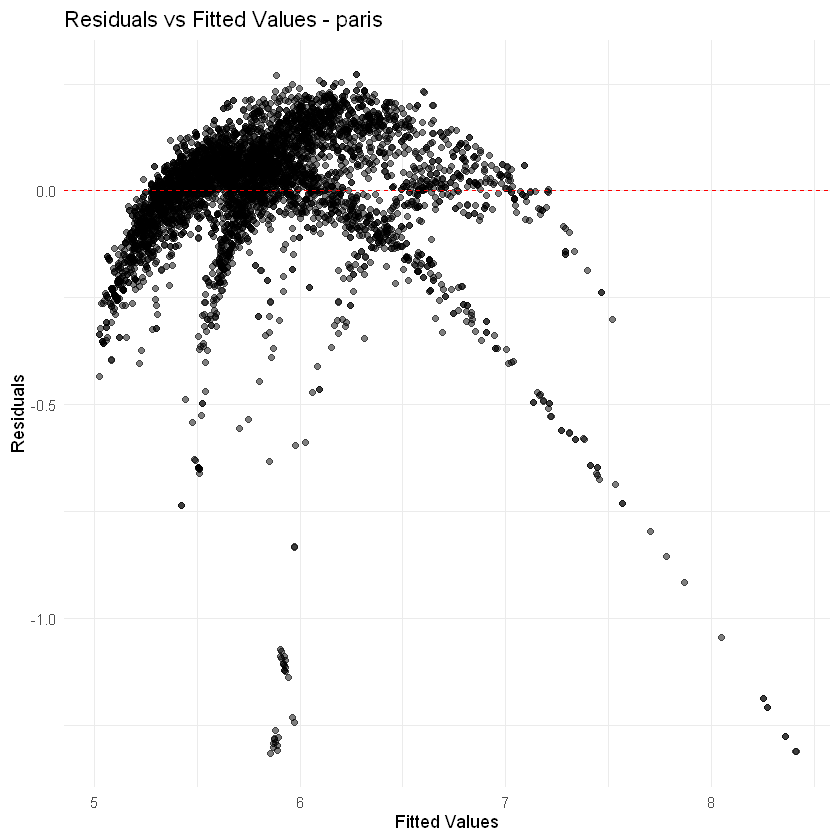

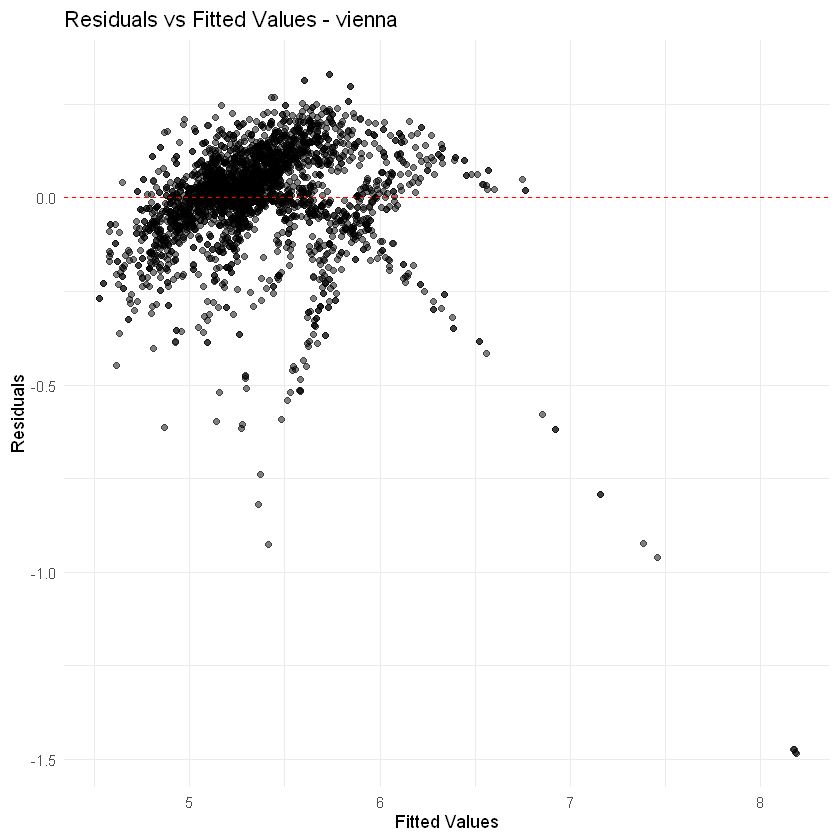

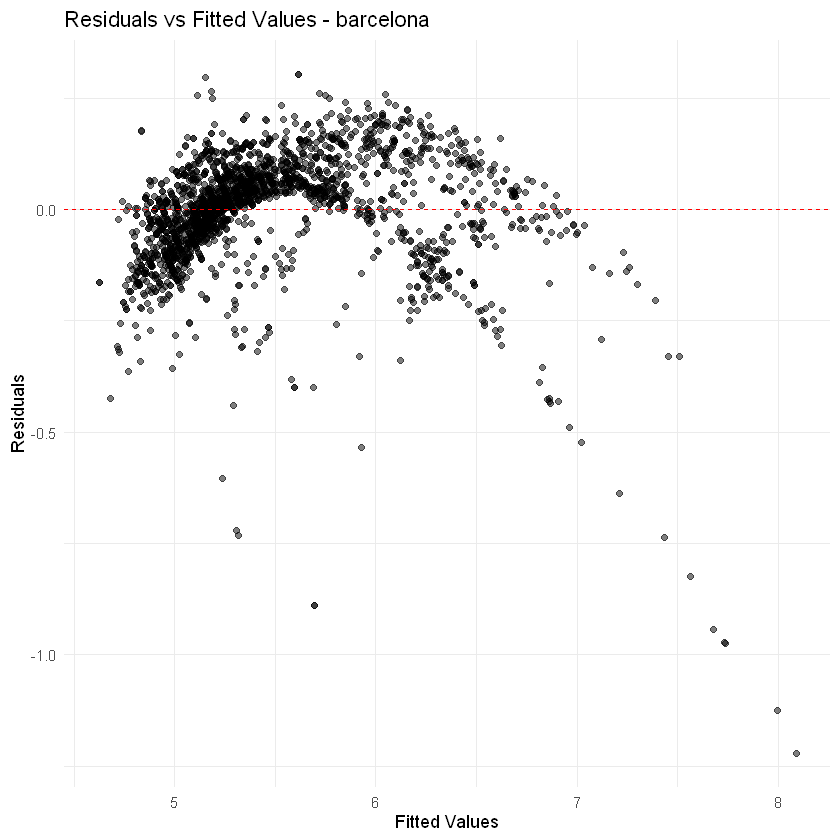

In [50]:
# visualizations of residuals for each city

city_models <- list(
  paris = fit_paris_0,
  vienna = fit_vienna_0,
  barcelona = fit_barcelona_0
)

for (city in names(city_models)) {
  model <- city_models[[city]]
  
  # Create a data frame of residuals
  residuals_df <- data.frame(
    Residuals = resid(model),
    Fitted = fitted(model)
  )
  
  # Plot residuals vs fitted values
  plot_residuals <- ggplot(residuals_df, aes(x = Fitted, y = Residuals)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
    labs(title = paste("Residuals vs Fitted Values -", city),
         x = "Fitted Values",
         y = "Residuals") +
    theme_minimal()
  
  print(plot_residuals)
}

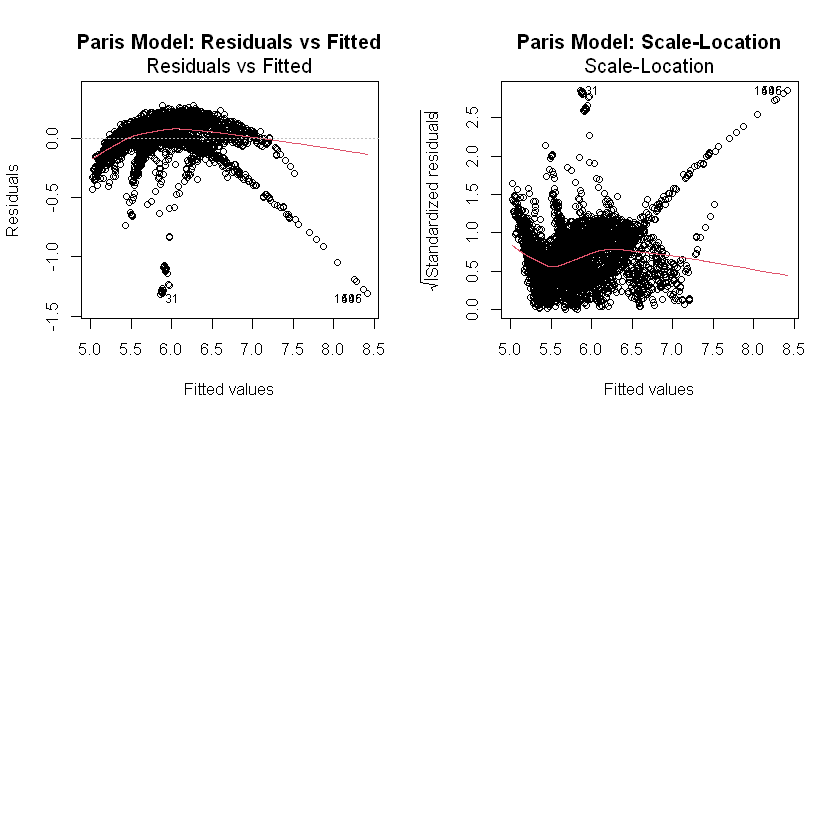

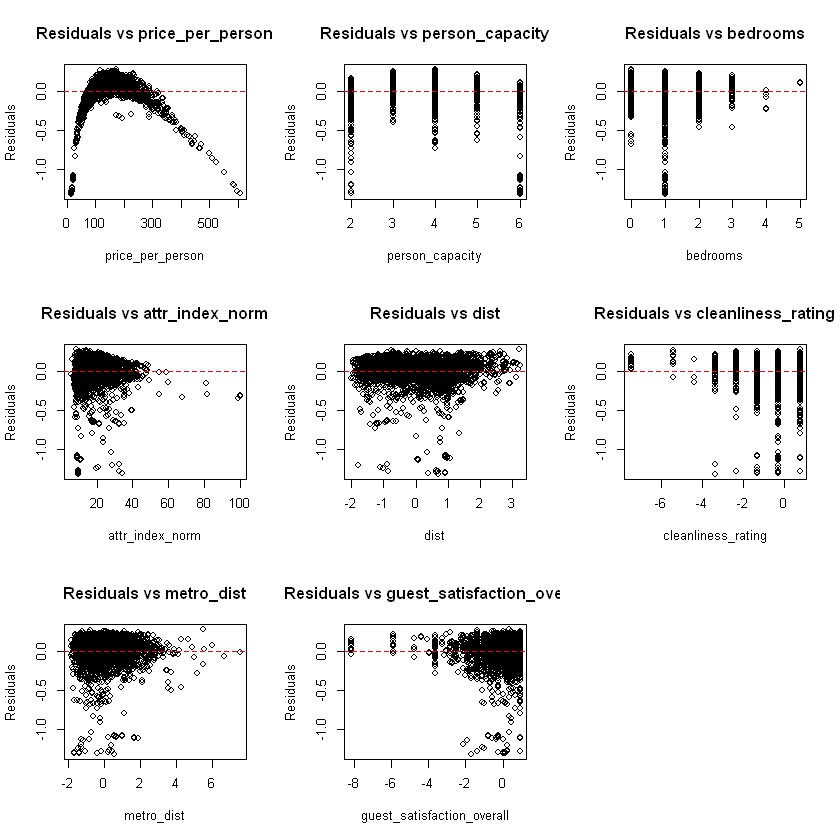

In [51]:
# find source of problems in Paris model

# Create diagnostic plots for Paris model
par(mfrow = c(2,2))

# 1. Residuals vs Fitted (Linearity check)
plot(fit_paris_0, which = 1, main = "Paris Model: Residuals vs Fitted")

# 2. Scale-Location plot (Homoscedasticity check)
plot(fit_paris_0, which = 3, main = "Paris Model: Scale-Location")

# 3. Additional diagnostic plots
# Create data frame with fitted values and residuals
paris_diagnostics <- data.frame(
  fitted = fitted(fit_paris_0),
  residuals = resid(fit_paris_0),
  std_residuals = rstandard(fit_paris_0)
)

# Scatter plots for each predictor vs residuals
predictors <- c("price_per_person", "person_capacity", "bedrooms", "attr_index_norm", 
                "dist", "cleanliness_rating", "metro_dist", "guest_satisfaction_overall")

par(mfrow = c(3,3))
for(pred in predictors) {
  plot(paris_train[[pred]], paris_diagnostics$residuals,
       xlab = pred, ylab = "Residuals",
       main = paste("Residuals vs", pred))
  abline(h = 0, col = "red", lty = 2)
}

# Reset plotting parameters
par(mfrow = c(1,1))

**Problems and suggestions with Paris model**
1. Linearity violations:

- Residuals vs Fitted shows a pronounced inverted-U shape: residuals start negative at lower fitted values, rise above zero in the middle, then drop below again at the high end.

- Implication: the model is missing a nonlinear relationship (e.g., higher-order terms) for one or more predictors (most likely price_per_person and/or dist).

2. Heteroskedasticity:
- Scale-Location plot fans out at both extremes of the fitted values, indicating non-constant variance of residuals.

- Implication: standard errors and p-values may be unreliable; a weighted or robust-SE approach (or further transformation) is needed.

3. Predictor-specific patterns:

- price_per_person: strong curve in residuals (U-shape) --> quadratic term
- dist: Nonlinear dip for high values → add I(dist^2)
- attr_index_norm: Slight curvature → consider transformation or spline
- guest_satisfaction_overall: Residuals tighten at one end → possibly quadratic
- cleanliness_rating: Clumping at extremes (factor effect?) → treat as factor or center it
- person_capacity, bedrooms, metro_dist: Residuals scatter fairly evenly; less urgent

In [52]:
fit_paris_1 <- lm(
  log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
  data = paris_train
)


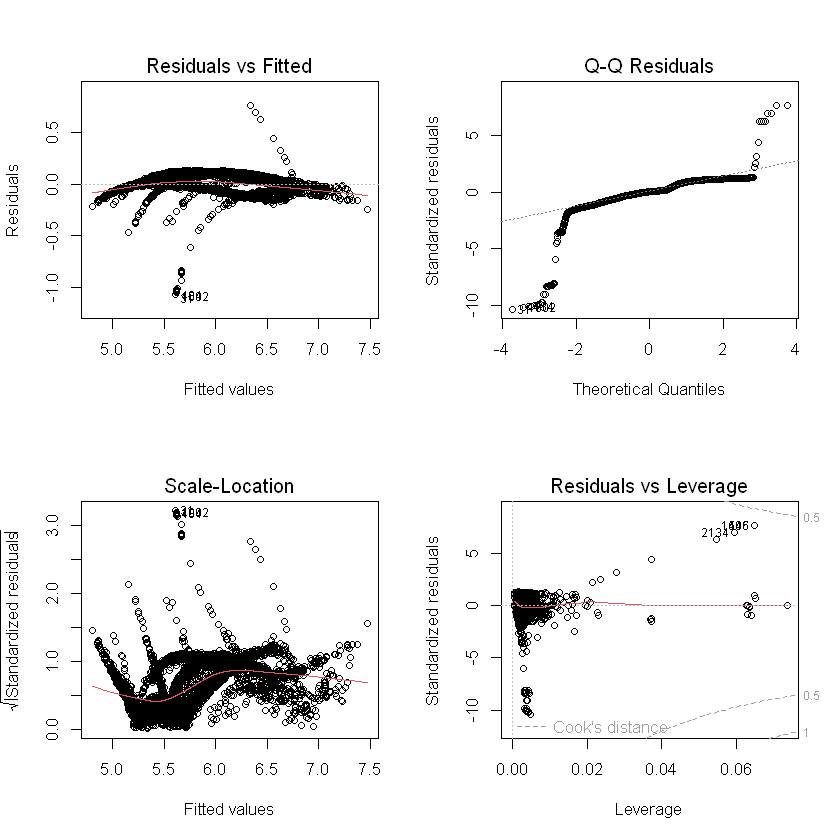

In [53]:
par(mfrow = c(2,2))
plot(fit_paris_1)

In [ ]:
# Set up cross-validation config
set.seed(301)  # for reproducibility
cv_control <- trainControl(method = "cv", number = 5)

# Train with 5-fold CV
cv_paris_1 <- train(
  log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
  data = paris_train,
  method = "lm",
  trControl = cv_control,
  metric = "RMSE"
)

# Print results
print(cv_paris_1)


Linear Regression 

5302 samples
   8 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4242, 4242, 4241, 4242, 4241 
Resampling results:

  RMSE       Rsquared   MAE     
  0.1036052  0.9536142  0.060966

Tuning parameter 'intercept' was held constant at a value of TRUE


**Comparison between MLR with no quadratic and with quadratic terms**\

Lower RMSE and MAE, higher Rsquared. The quadratic terms help capture the non-linear patterns that were clearly present in the residual plots

In [ ]:
# install.packages("glmnet") # uncomment if you haven't installed glmnet yet

Installing package into 'C:/Users/quydu/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\quydu\AppData\Local\Temp\RtmpQDfY1p\downloaded_packages


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-10



Best lambda: 0.0005135032 


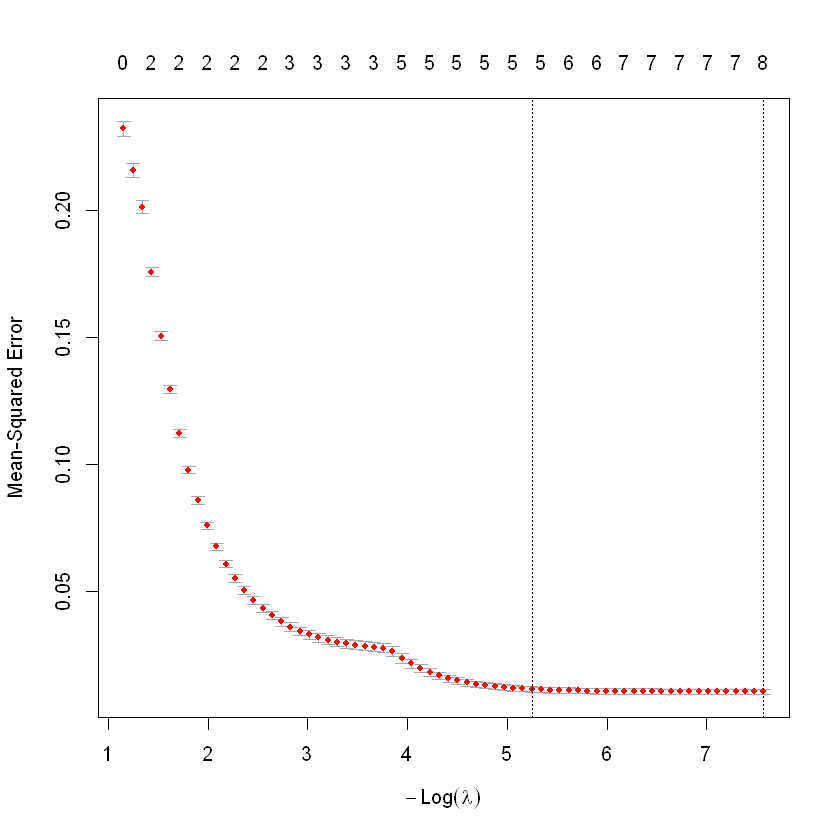

In [56]:
# lasso regression

library(glmnet)

set.seed(42)

x <- model.matrix(log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist, 
    data = paris_train)[, -1]

y <- paris_train$log_realSum

# Fit Lasso with 5-fold CV
cv_lasso <- cv.glmnet(
  x, y, 
  alpha = 1,               # Lasso
  nfolds = 5, 
  standardize = TRUE
)

# Best lambda
cat("Best lambda:", cv_lasso$lambda.min, "\n")

# Plot CV error
plot(cv_lasso)

# Final model
lasso_best <- glmnet(x, y, alpha = 1, lambda = cv_lasso$lambda.min)


In [57]:
# extract RMSE, R-squared, and MAE from the Lasso model

lasso_rmse <- sqrt(mean((y - predict(lasso_best, s = cv_lasso$lambda.min, newx = x))^2))
lasso_r_squared <- 1 - (sum((y - predict(lasso_best, s = cv_lasso$lambda.min, newx = x))^2) / sum((y - mean(y))^2))
lasso_mae <- mean(abs(y - predict(lasso_best, s = cv_lasso$lambda.min, newx = x)))

# Create a data frame to store the results
lasso_results <- data.frame(
  Model = "Lasso Regression",
  RMSE = lasso_rmse,
  R_squared = lasso_r_squared,
  MAE = lasso_mae
)
# Print the results
print(lasso_results)

             Model      RMSE R_squared        MAE
1 Lasso Regression 0.1032564 0.9541091 0.06081767


**Insights**

Lasso performs really slightly better. Hence, for paris, we'll use Lasso regression on the test set

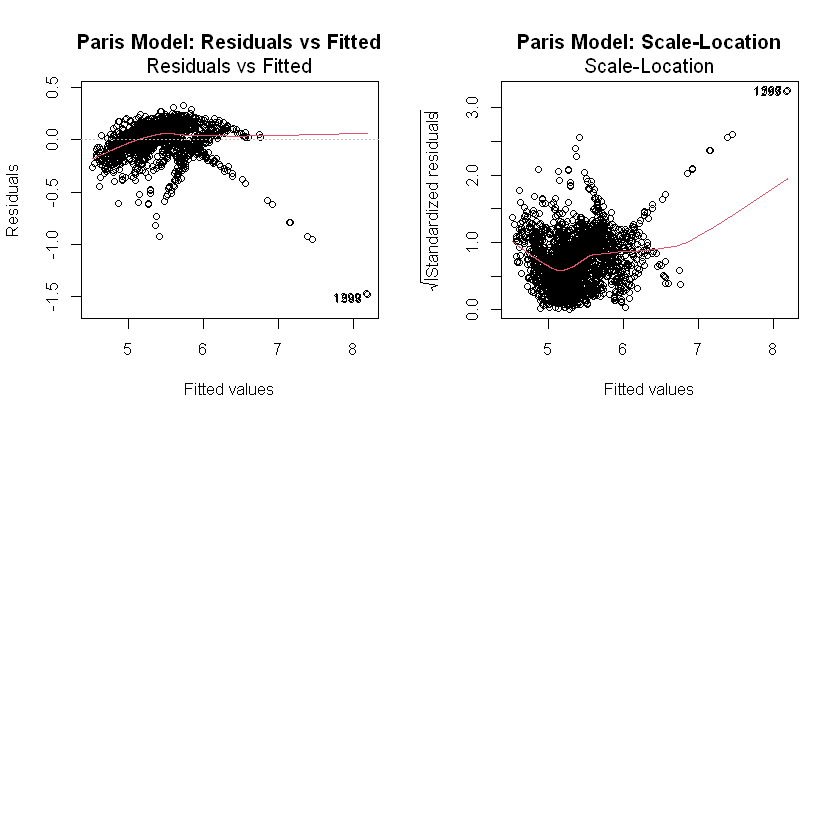

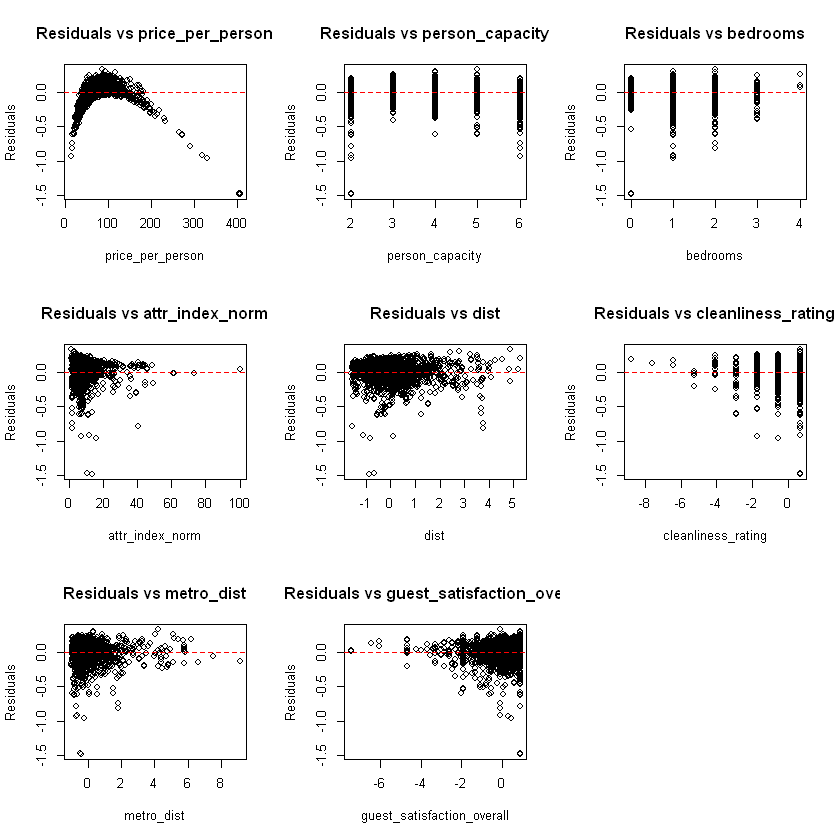

In [58]:
# find source of problems in Vienna model

# Create diagnostic plots for Vienna model
par(mfrow = c(2,2))

# 1. Residuals vs Fitted (Linearity check)
plot(fit_vienna_0, which = 1, main = "Paris Model: Residuals vs Fitted")

# 2. Scale-Location plot (Homoscedasticity check)
plot(fit_vienna_0, which = 3, main = "Paris Model: Scale-Location")

# 3. Additional diagnostic plots
# Create data frame with fitted values and residuals
vienna_diagnostics <- data.frame(
  fitted = fitted(fit_vienna_0),
  residuals = resid(fit_vienna_0),
  std_residuals = rstandard(fit_vienna_0)
)

# Scatter plots for each predictor vs residuals
predictors <- c("price_per_person", "person_capacity", "bedrooms", "attr_index_norm", 
                "dist", "cleanliness_rating", "metro_dist", "guest_satisfaction_overall")

par(mfrow = c(3,3))
for(pred in predictors) {
  plot(vienna_train[[pred]], vienna_diagnostics$residuals,
       xlab = pred, ylab = "Residuals",
       main = paste("Residuals vs", pred))
  abline(h = 0, col = "red", lty = 2)
}

# Reset plotting parameters
par(mfrow = c(1,1))

**Problems and suggestions with the Vienna model**

SIMILAR TO PARIS

In [59]:
fit_vienna_1 <- lm(
  log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
  data = vienna_train
)

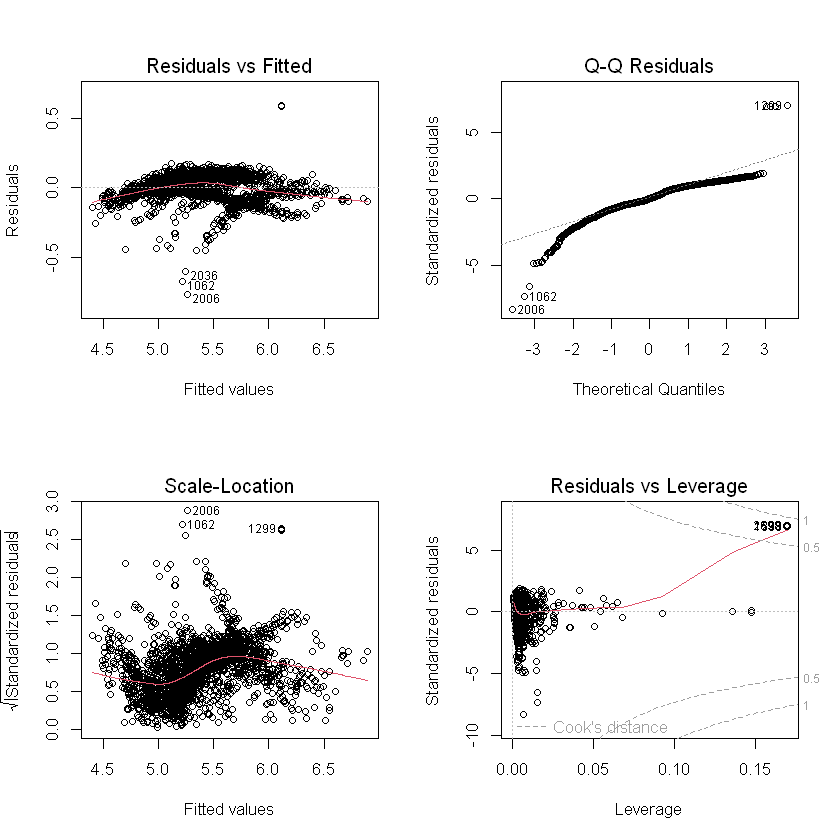

In [60]:
par(mfrow = c(2,2))
plot(fit_vienna_1)

In [ ]:
# Set up cross-validation config
set.seed(301)  # for reproducibility
cv_control <- trainControl(method = "cv", number = 5)

# Train with 5-fold CV
cv_vienna_1 <- train(
  log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
  data = vienna_train,
  method = "lm",
  trControl = cv_control,
  metric = "RMSE"
)

# Print results
print(cv_vienna_1)

Linear Regression 

2827 samples
   8 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2261, 2263, 2261, 2262, 2261 
Resampling results:

  RMSE        Rsquared   MAE       
  0.09303186  0.9466159  0.06962833

Tuning parameter 'intercept' was held constant at a value of TRUE


**Insights**

RMSE drops from 0.143 to 0.093, Rsquared increases from 0.875 to 0.947, and MAE drops from 0.095 to 0.07. --> Quadratic terms WORKED

Best lambda: 0.0005038652 


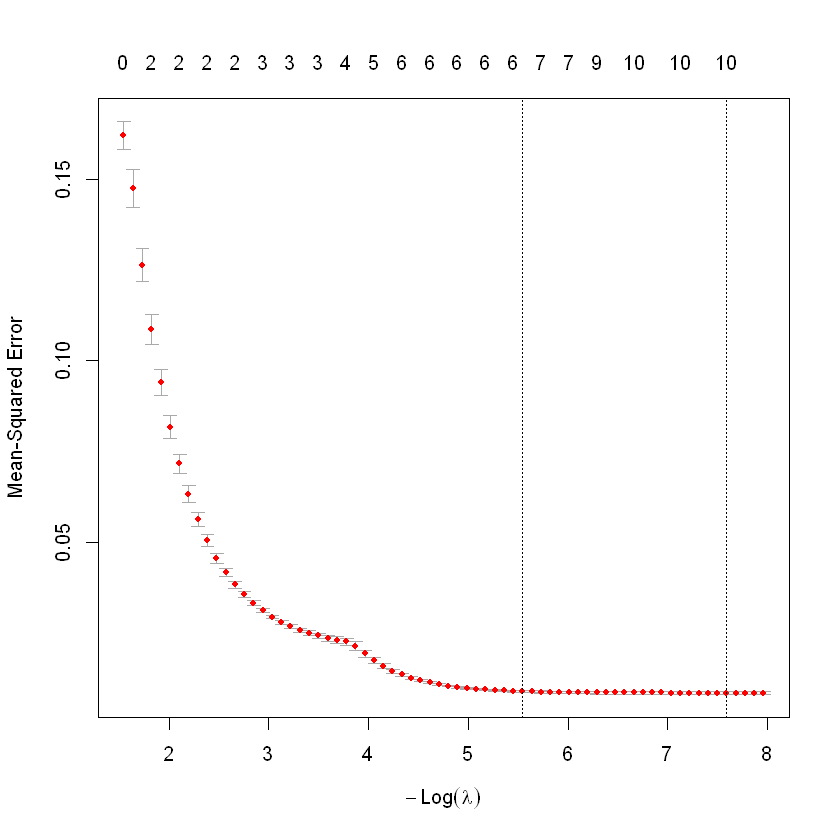

In [62]:
# lasso regression

library(glmnet)

set.seed(42)

x_vienna <- model.matrix(log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist, 
    data = vienna_train)[, -1]

y_vienna <- vienna_train$log_realSum

# Fit Lasso with 5-fold CV
cv_lasso_vienna <- cv.glmnet(
  x_vienna, y_vienna, 
  alpha = 1,               # Lasso
  nfolds = 5, 
  standardize = TRUE
)

# Best lambda
cat("Best lambda:", cv_lasso_vienna$lambda.min, "\n")

# Plot CV error
plot(cv_lasso_vienna)

# Final model
lasso_best_vienna <- glmnet(x_vienna, y_vienna, alpha = 1, lambda = cv_lasso_vienna$lambda.min)


In [63]:
# extract RMSE, R-squared, and MAE from the Lasso model

lasso_rmse_vienna <- sqrt(mean((y_vienna - predict(lasso_best_vienna, s = cv_lasso_vienna$lambda.min, newx = x_vienna))^2))
lasso_r_squared_vienna <- 1 - (sum((y_vienna - predict(lasso_best_vienna, s = cv_lasso_vienna$lambda.min, newx = x_vienna))^2) / sum((y_vienna - mean(y_vienna))^2))
lasso_mae_vienna <- mean(abs(y_vienna - predict(lasso_best_vienna, s = cv_lasso_vienna$lambda.min, newx = x_vienna)))

# Create a data frame to store the results
lasso_results_vienna <- data.frame(
  Model = "Lasso Regression",
  RMSE = lasso_rmse_vienna,
  R_squared = lasso_r_squared_vienna,
  MAE = lasso_mae_vienna
)
# Print the results
print(lasso_results_vienna)

             Model       RMSE R_squared        MAE
1 Lasso Regression 0.09252637 0.9472472 0.06944607


**Insights**

Again, Lasso performs slightly better, so it will be used in the test set

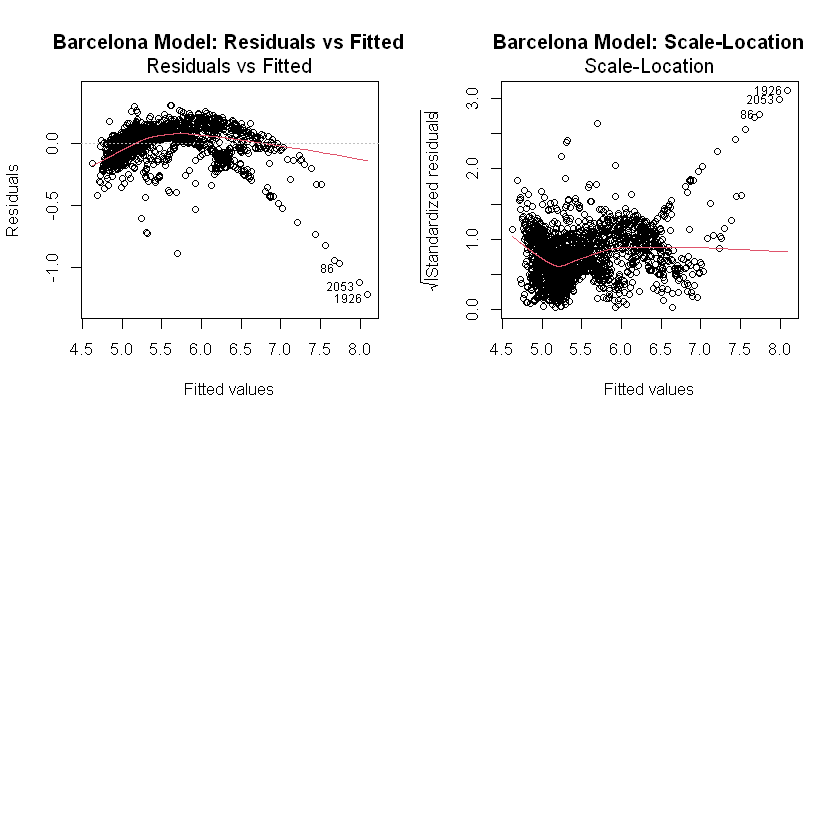

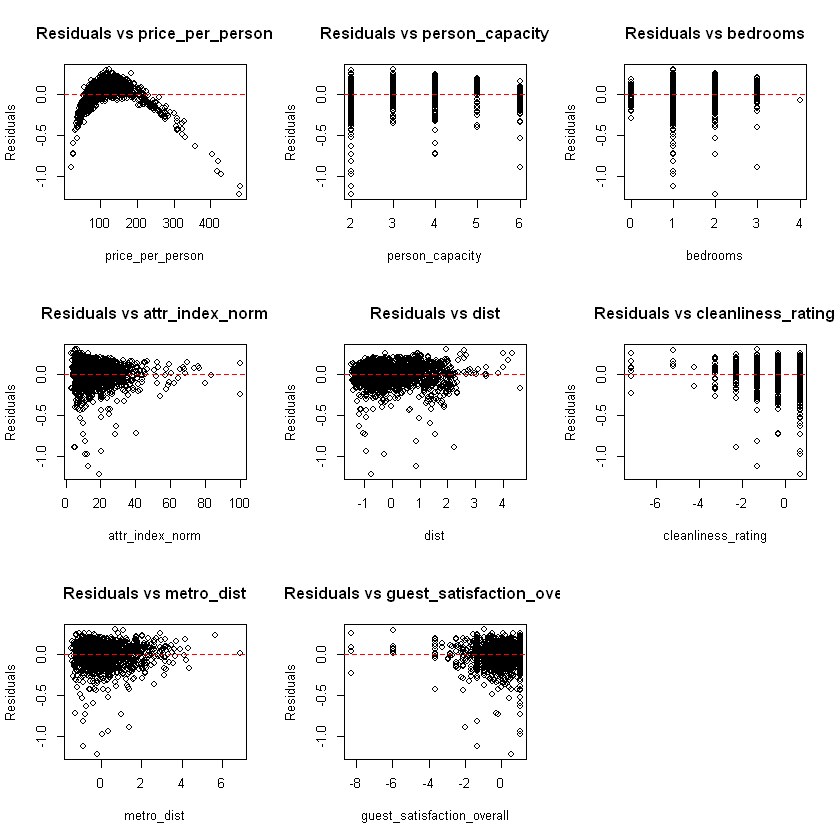

In [64]:
# find source of problems in Barcelona model

# Create diagnostic plots for Barcelona model
par(mfrow = c(2,2))

# 1. Residuals vs Fitted (Linearity check)
plot(fit_barcelona_0, which = 1, main = "Barcelona Model: Residuals vs Fitted")

# 2. Scale-Location plot (Homoscedasticity check)
plot(fit_barcelona_0, which = 3, main = "Barcelona Model: Scale-Location")

# 3. Additional diagnostic plots
# Create data frame with fitted values and residuals
barcelona_diagnostics <- data.frame(
  fitted = fitted(fit_barcelona_0),
  residuals = resid(fit_barcelona_0),
  std_residuals = rstandard(fit_barcelona_0)
)

# Scatter plots for each predictor vs residuals
predictors <- c("price_per_person", "person_capacity", "bedrooms", "attr_index_norm", 
                "dist", "cleanliness_rating", "metro_dist", "guest_satisfaction_overall")

par(mfrow = c(3,3))
for(pred in predictors) {
  plot(barcelona_train[[pred]], barcelona_diagnostics$residuals,
       xlab = pred, ylab = "Residuals",
       main = paste("Residuals vs", pred))
  abline(h = 0, col = "red", lty = 2)
}

# Reset plotting parameters
par(mfrow = c(1,1))

**Problems and suggestions for Barcelona model**

SIMILAR TO PARIS AND VIENNA

In [65]:
fit_barcelona_1 <- lm(
  log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
  data = barcelona_train
)

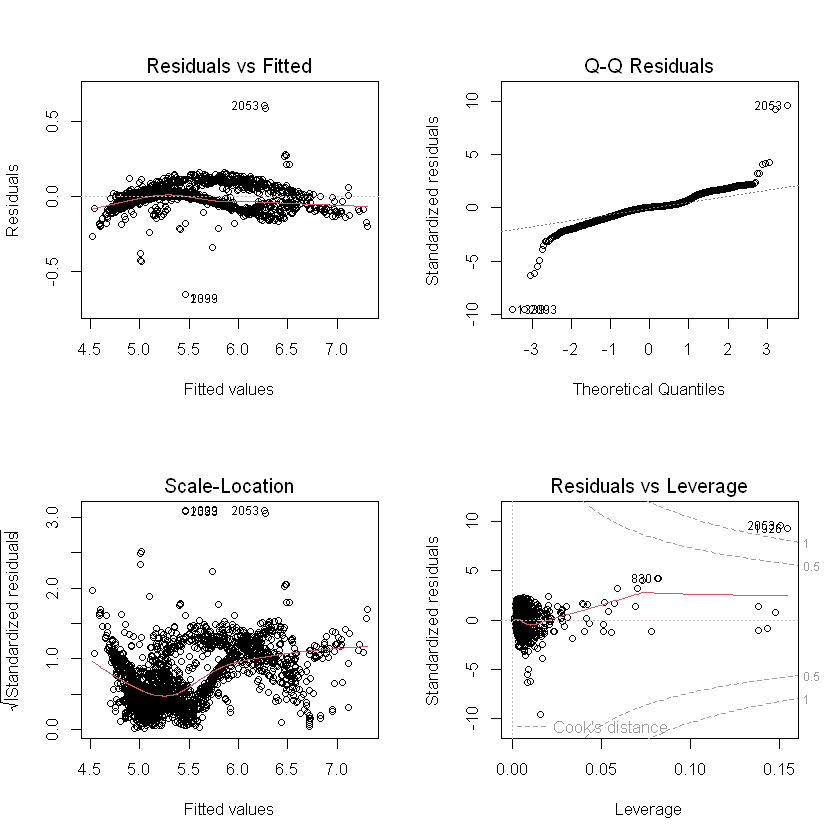

In [66]:
par(mfrow = c(2,2))
plot(fit_barcelona_1)

In [67]:
# Set up cross-validation config
set.seed(301)  # for reproducibility
cv_control <- trainControl(method = "cv", number = 5)

# Train with 5-fold CV
cv_barcelona_1 <- train(
  log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
  data = barcelona_train,
  method = "lm",
  trControl = cv_control,
  metric = "RMSE"
)

# Print results
print(cv_barcelona_1)

Linear Regression 

2255 samples
   8 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1805, 1803, 1805, 1804, 1803 
Resampling results:

  RMSE        Rsquared   MAE       
  0.06950954  0.9831863  0.04553238

Tuning parameter 'intercept' was held constant at a value of TRUE


**Insights**

RMSE decreases from 0.128 to 0.07, Rsquared increases from 0.943 to 0.983, and MAE decreases from 0.088 to 0.045 --> Quadratic terms WORKED

Best lambda: 0.0004841957 


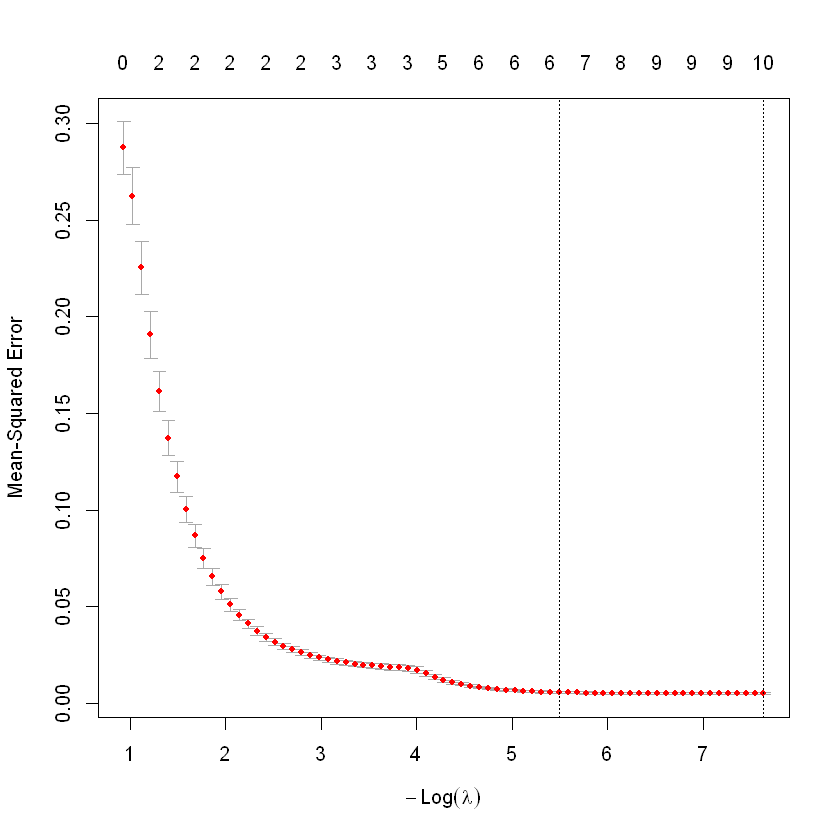

In [68]:
# lasso regression

library(glmnet)

set.seed(42)

x_barcelona <- model.matrix(log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist, 
    data = barcelona_train)[, -1]

y_barcelona <- barcelona_train$log_realSum

# Fit Lasso with 5-fold CV
cv_lasso_barcelona <- cv.glmnet(
  x_barcelona, y_barcelona, 
  alpha = 1,               # Lasso
  nfolds = 5, 
  standardize = TRUE
)

# Best lambda
cat("Best lambda:", cv_lasso_barcelona$lambda.min, "\n")

# Plot CV error
plot(cv_lasso_barcelona)

# Final model
lasso_best_barcelona <- glmnet(x_barcelona, y_barcelona, alpha = 1, lambda = cv_lasso_barcelona$lambda.min)

In [69]:
# extract RMSE, R-squared, and MAE from the Lasso model

lasso_rmse_barcelona <- sqrt(mean((y_barcelona - predict(lasso_best_barcelona, s = cv_lasso_barcelona$lambda.min, newx = x_barcelona))^2))
lasso_r_squared_barcelona <- 1 - (sum((y_barcelona - predict(lasso_best_barcelona, s = cv_lasso_barcelona$lambda.min, newx = x_barcelona))^2) / sum((y_barcelona - mean(y_barcelona))^2))
lasso_mae_barcelona <- mean(abs(y_barcelona - predict(lasso_best_barcelona, s = cv_lasso_barcelona$lambda.min, newx = x_barcelona)))

# Create a data frame to store the results
lasso_results_barcelona <- data.frame(
  Model = "Lasso Regression",
  RMSE = lasso_rmse_barcelona,
  R_squared = lasso_r_squared_barcelona,
  MAE = lasso_mae_barcelona
)
# Print the results
print(lasso_results_barcelona)

             Model       RMSE R_squared       MAE
1 Lasso Regression 0.06860284   0.98374 0.0456896


Lasso regression performs slightly better. Hence, it will be used on the test set

# PREDICTIONS

In [72]:
# apply lasso model on test set for each city

lasso_predictions_paris <- predict(lasso_best, s = cv_lasso$lambda.min, newx = model.matrix(log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist, 
    data = paris_test)[, -1])

lasso_predictions_vienna <- predict(lasso_best_vienna, s = cv_lasso_vienna$lambda.min, newx = model.matrix(log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist, 
    data = vienna_test)[, -1])

lasso_predictions_barcelona <- predict(lasso_best_barcelona, s = cv_lasso_barcelona$lambda.min, newx = model.matrix(log_realSum ~
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist, 
    data = barcelona_test)[, -1])

# Combine predictions with actual values for each city
paris_results <- data.frame(
  Actual = paris_test$log_realSum,
  Predicted = as.vector(lasso_predictions_paris)  # Convert matrix to vector
)

vienna_results <- data.frame(
  Actual = vienna_test$log_realSum,
  Predicted = as.vector(lasso_predictions_vienna)
)

barcelona_results <- data.frame(
  Actual = barcelona_test$log_realSum,
  Predicted = as.vector(lasso_predictions_barcelona)
)

# Calculate RMSE, R-squared, and MAE for each city's predictions
calculate_metrics <- function(actual, predicted) {
  rmse <- sqrt(mean((actual - predicted)^2))
  r_squared <- 1 - (sum((actual - predicted)^2) / sum((actual - mean(actual))^2))
  mae <- mean(abs(actual - predicted))
  
  return(data.frame(RMSE = rmse, R_squared = r_squared, MAE = mae))
}

# Calculate metrics for each city
paris_metrics <- calculate_metrics(paris_results$Actual, paris_results$Predicted)
vienna_metrics <- calculate_metrics(vienna_results$Actual, vienna_results$Predicted)
barcelona_metrics <- calculate_metrics(barcelona_results$Actual, barcelona_results$Predicted)

# Combine metrics into a single data frame
metrics_results <- rbind(
  data.frame(City = "Paris", paris_metrics),
  data.frame(City = "Vienna", vienna_metrics),
  data.frame(City = "Barcelona", barcelona_metrics)
)
print(metrics_results)

       City       RMSE R_squared        MAE
1     Paris 0.09521287 0.9580541 0.06200653
2    Vienna 0.08808553 0.9491350 0.06989879
3 Barcelona 0.06853027 0.9835955 0.04653730


In [73]:
# compare test metrics with cross-validated metrics for each city

comparison_results <- data.frame(
  City = c("Paris", "Vienna", "Barcelona"),
  CV_RMSE = c(cv_paris_1$results$RMSE, cv_vienna_1$results$RMSE, cv_barcelona_1$results$RMSE),
  Test_RMSE = c(paris_metrics$RMSE, vienna_metrics$RMSE, barcelona_metrics$RMSE),
  CV_R_squared = c(cv_paris_1$results$Rsquared, cv_vienna_1$results$Rsquared, cv_barcelona_1$results$Rsquared),
  Test_R_squared = c(paris_metrics$R_squared, vienna_metrics$R_squared, barcelona_metrics$R_squared),
  CV_MAE = c(cv_paris_1$results$MAE, cv_vienna_1$results$MAE, cv_barcelona_1$results$MAE),
  Test_MAE = c(paris_metrics$MAE, vienna_metrics$MAE, barcelona_metrics$MAE)
)

# Round the results to 3 decimal places
comparison_results[,2:7] <- round(comparison_results[,2:7], 3)
# Print the comparison results
print("Comparison of Cross-Validated Metrics vs Test Metrics:")
print(comparison_results)

[1] "Comparison of Cross-Validated Metrics vs Test Metrics:"
       City CV_RMSE Test_RMSE CV_R_squared Test_R_squared CV_MAE Test_MAE
1     Paris   0.104     0.095        0.954          0.958  0.061    0.062
2    Vienna   0.093     0.088        0.947          0.949  0.070    0.070
3 Barcelona   0.070     0.069        0.983          0.984  0.046    0.047


**Insights**

GOOD MODEL. No overfitting present (can be checked by running CTRL F + each of 'paris_test', 'vienna_test', and 'barcelona_test' to see that they're not used during the training + cross-validation part)

# INFERENCE

In [76]:
library(broom)

fit_paris_inf <- lm(
  log_realSum ~ 
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
  data = paris_inference
)

paris_inference_results <- tidy(fit_paris_inf, conf.int = TRUE) %>%
  mutate(across(where(is.numeric), ~ round(.x, 4)))

fit_vienna_inf <- lm(
  log_realSum ~
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
    data = vienna_inference
)

vienna_inference_results <- tidy(fit_vienna_inf, conf.int = TRUE) %>%
  mutate(across(where(is.numeric), ~ round(.x, 4)))

fit_barcelona_inf <- lm(
  log_realSum ~
    price_per_person + I(price_per_person^2) +
    dist             + I(dist^2)             +
    guest_satisfaction_overall + I(guest_satisfaction_overall^2) +
    person_capacity + bedrooms +
    attr_index_norm + cleanliness_rating + metro_dist,
    data = barcelona_inference
)

barcelona_inference_results <- tidy(fit_barcelona_inf, conf.int = TRUE) %>%
  mutate(across(where(is.numeric), ~ round(.x, 4)))



In [77]:
print("Paris Inference Results:")
print(paris_inference_results)

[1] "Paris Inference Results:"
# A tibble: 12 × 7
   term                  estimate std.error statistic p.value conf.low conf.high
   <chr>                    <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
 1 (Intercept)             3.51      0.0238   147.     0        3.46      3.55  
 2 price_per_person        0.0139    0.0002    56.1    0        0.0134    0.0144
 3 I(price_per_person^2)   0         0        -31.3    0        0         0     
 4 dist                    0.0116    0.0048     2.42   0.0157   0.0022    0.0209
 5 I(dist^2)              -0.0013    0.003     -0.422  0.673   -0.0071    0.0046
 6 guest_satisfaction_o…   0.0151    0.006      2.54   0.0112   0.0035    0.0268
 7 I(guest_satisfaction…   0.0019    0.0011     1.76   0.0787  -0.0002    0.004 
 8 person_capacity         0.295     0.0037    79.2    0        0.288     0.303 
 9 bedrooms               -0.0027    0.0072    -0.382  0.703   -0.0168    0.0113
10 attr_index_norm         0.001     0.0007     1.49   0.13

In [78]:
print("Vienna Inference Results:")
print(vienna_inference_results)

[1] "Vienna Inference Results:"
# A tibble: 12 × 7
   term                  estimate std.error statistic p.value conf.low conf.high
   <chr>                    <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
 1 (Intercept)             3.15      0.0323   97.4     0        3.09      3.21  
 2 price_per_person        0.0215    0.0005   41.8     0        0.0204    0.0225
 3 I(price_per_person^2)  -0.0001    0       -22.1     0       -0.0001    0     
 4 dist                   -0.0099    0.0086   -1.14    0.254   -0.0268    0.0071
 5 I(dist^2)              -0.0002    0.0027   -0.0713  0.943   -0.0055    0.0051
 6 guest_satisfaction_o…  -0.0069    0.0072   -0.960   0.338   -0.0212    0.0073
 7 I(guest_satisfaction…   0.0009    0.0011    0.823   0.411   -0.0013    0.0031
 8 person_capacity         0.293     0.0049   60.1     0        0.283     0.302 
 9 bedrooms               -0.0218    0.0091   -2.40    0.0171  -0.0396   -0.0039
10 attr_index_norm        -0.0003    0.0008   -0.361   0.7

In [79]:
print("Barcelona Inference Results:")
print(barcelona_inference_results)

[1] "Barcelona Inference Results:"
# A tibble: 12 × 7
   term                  estimate std.error statistic p.value conf.low conf.high
   <chr>                    <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
 1 (Intercept)             3.39      0.0233  146.      0        3.35      3.44  
 2 price_per_person        0.0162    0.0003   53.4     0        0.0156    0.0168
 3 I(price_per_person^2)   0         0       -27.7     0        0         0     
 4 dist                   -0.0149    0.0064   -2.34    0.0201  -0.0274   -0.0024
 5 I(dist^2)              -0.0015    0.0025   -0.587   0.557   -0.0065    0.0035
 6 guest_satisfaction_o…   0.0034    0.0063    0.545   0.586   -0.0089    0.0157
 7 I(guest_satisfaction…   0.0008    0.0012    0.644   0.520   -0.0016    0.0031
 8 person_capacity         0.282     0.0047   59.8     0        0.273     0.292 
 9 bedrooms                0.016     0.0097    1.64    0.102   -0.0032    0.0351
10 attr_index_norm        -0.0009    0.0005   -1.77    

**Paris inference insights**

- **Intercept (3.51):**  
  When all predictors are at zero, the expected log(price) is 3.51. 

- **price_per_person (0.0139):**  
  For each 1 euro increase in price per person, the expected log(total price) increases by 0.0139, holding other variables constant.  
  In terms of percentage: exp(0.0139) ≈ 1.014, so a 1 euro increase in price per person is associated with a **1.4% increase in total price**.

- **dist (0.0116):**  
  For each 1 unit increase in distance from the city center (assuming units are kilometers), the expected log(total price) increases by 0.0116.  
  This means listings farther from the center are **about 1.2% more expensive per km**, holding other factors constant.

- **guest_satisfaction_overall (0.0151):**  
  For each 1-point increase in guest satisfaction rating (scale 0–10), the expected log(total price) increases by 0.0151.  
  This translates to a **1.5% increase in price per rating point**.

- **person_capacity (0.295):**  
  For each additional person the listing can accommodate, the expected log(total price) increases by 0.295.  
  This means **each extra guest capacity increases price by about 34%** (exp(0.295) ≈ 1.34).

- **Quadratic terms (price_per_person^2, dist^2, guest_satisfaction_overall^2):**  
  These are not statistically significant (p > 0.05), so their effects are not reliably different from zero.

- **Other predictors (bedrooms, attr_index_norm, cleanliness_rating, metro_dist):**  
  These are not statistically significant, so we do not interpret their coefficients.

**Summary:**  
- Listings with higher price per person, further from the city center, higher guest satisfaction, and greater person capacity tend to have higher prices.
- The effect sizes are:  
  - **1 euro/person → +1.4% price**  
  - **1 km from center → +1.2% price**  
  - **1 rating point → +1.5% price**  
  - **1 extra guest capacity → +34% price**

**Vienna inference insights (statistically significant predictors):**

- **price_per_person (0.0215):**  
  An increase of 1 euro in `price_per_person` (the price paid per guest) is associated with a 0.0215 increase in log(total price), holding other variables constant.  
  This means each extra euro per guest increases the total price by about 2.2% (exp(0.0215) ≈ 1.022).

- **I(price_per_person^2) (-0.0001):**  
  For each additional squared euro per guest, log(total price) decreases by 0.0001.  
  This suggests diminishing returns: as price per person gets very high, the effect on total price slightly tapers off.

- **person_capacity (0.284):**  
  An increase of 1 person in `person_capacity` (maximum number of guests) is associated with a 0.284 increase in log(total price).  
  This means each extra guest capacity increases price by about 33% (exp(0.284) ≈ 1.33).

- **cleanliness_rating (0.126):**  
  An increase of 1 point in `cleanliness_rating` is associated with a 0.126 increase in log(total price).  
  This means each extra point in cleanliness rating increases price by about 13.4% (exp(0.126) ≈ 1.134).

- **Other predictors (guest_satisfaction_overall, attr_index_norm, cleanliness_rating, metro_dist, quadratic terms):**  
  These are not statistically significant (p > 0.05), so their effects are not reliably different from zero.

**Note:**  
- All changes are interpreted as holding other variables constant.
- The response variable is log(realSum), the natural logarithm of the total price of the Airbnb

**Barcelona inference insights**

- **price_per_person (0.0162):**  
  An increase of 1 euro in `price_per_person` is associated with a 0.0162 increase in log(total price), holding other variables constant.  
  This means each extra euro per guest increases the total price by about 1.6% (exp(0.0162) ≈ 1.016).

- **I(price_per_person^2) (0):**  
  The quadratic term for price per person is statistically significant but the estimate is essentially zero, so its practical effect is negligible.

- **dist (-0.0149):**  
  An increase of 1 unit in `dist` (distance from city centre) is associated with a 0.0149 decrease in log(total price).  
  Each extra unit away from the centre decreases price by about 1.5% (exp(-0.0149) ≈ 0.985).

- **person_capacity (0.282):**  
  An increase of 1 person in `person_capacity` is associated with a 0.282 increase in log(total price).  
  This means each extra guest capacity increases price by about 32.6% (exp(0.282) ≈ 1.326).

**Note:**  
- All changes are interpreted as holding other variables constant.
- The response variable is log(realSum), the natural logarithm of the total price of the Airbnb